# <p style="background-color:#fbaa7f  ; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Fraud Detection</p>

<img src="one.jpg" width="1800"> 

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f ; font-size:120%; text-align:left">

<h3 align="left"><font color=brown>Problem:</font></h3>

<h3 align="left"><font color=black>The increasing volume of mobile financial transactions has led to a corresponding rise in fraudulent activities, posing significant financial risks to both businesses and consumers. Current methods of fraud detection may lack the precision and speed required to identify fraudulent transactions in real-time, leading to financial losses and compromised security. The challenge is to develop an accurate and efficient solution that can detect and prevent fraudulent transactions as they occur, without hindering the user experience.
</font></h3>

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f ; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Objectives:</font></h3>

<h3 align="left"><font color=black>

* __Explore the Dataset:__ Uncover patterns, distributions, and relationships within the data to gain a comprehensive understanding of the factors influencing fraud detection.

* __Conduct Extensive Exploratory Data Analysis (EDA):__ Analyze bivariate relationships against the target variable to identify significant predictors of fraudulent transactions.

* __Preprocessing Steps:__

    -Remove irrelevant features that do not contribute to the predictive power of the model.

    -Address missing values to ensure data completeness and integrity.

    -Treat outliers to reduce their impact on model performance.

    -Encode categorical variables to convert them into a format suitable for machine learning algorithms.

    -Transform skewed features to achieve normal-like distributions, enhancing model accuracy.

* __Model Building:__

    -Establish pipelines for models that require scaling to ensure consistent performance.

    -Implement and tune classification models, including Logistic Regression, SVM, Decision Trees, and Random Forest, to identify fraudulent transactions.

    -Emphasize achieving high precision for classifying fraudulent transactions, ensuring the model can effectively distinguish between legitimate and fraudulent activities.

* __Evaluate and Compare Model Performance:__ Utilize metrics such as precision, recall, F1-score, and ROC AUC to assess and compare the effectiveness of the models in accurately detecting fraudulent transactions.</font></h3>


<img src="" width="1800">

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color:white ; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
        - [Step 4.1.2 | Categorical Variables Univariate Analysis](#cat_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Numerical Features vs Target](#num_target)
        - [Step 4.2.2 | Categorical Features vs Target](#cat_target)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Categorical Features Encoding](#encoding)
    - [Step 5.5 | Feature Scaling](#scaling)
    - [Step 5.6 | Transforming Skewed Features](#transform)
* [Step 6 | Decision Tree Model Building](#dt)
    - [Step 6.1 | DT Base Model Definition](#dt_base)
    - [Step 6.2 | DT Hyperparameter Tuning](#dt_hp)
    - [Step 6.3 | DT Model Evaluation](#dt_eval)
* [Step 7 | Random Forest Model Building](#rf)
    - [Step 7.1 | RF Base Model Definition](#rf_base)
    - [Step 7.2 | RF Hyperparameter Tuning](#rf_hp)
    - [Step 7.3 | RF Model Evaluation](#rf_eval)
* [Step 8 | Logistic Regression Model Building](#logistic)
    - [Step 8.1 | Logistic Base Model Definition](#logistic_base)
    - [Step 8.2 | Logistic Hyperparameter Tuning](#logistic_hp)
    - [Step 8.3 | Logistic Model Evaluation](#logistic_eval)
* [Step 9 | SVM Model Building](#svm)
    - [Step 9.1 | SVM Base Model Definition](#svm_base)
    - [Step 9.2 | SVM Hyperparameter Tuning](#svm_hp)
    - [Step 9.3 | SVM Model Evaluation](#svm_eval)
* [Step 10 | XGBoost Model Building](#conclusion)
* [Step 11 | Conclusion](#conclusion)
* [Step 12 | Prediction](#prediction)

<h2 align="left"><font color=brown>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_tabel)

In [70]:

# Import essential libraries
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

# Import libraries for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from scipy.stats import boxcox

# Import libraries for model selection and evaluation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Import machine learning models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Import libraries for interactive widgets and display in Jupyter Notebook
import ipywidgets as widgets
from IPython.display import display, HTML

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

In [2]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark| grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

<a id="read"></a>
# <p style="background-color:#fbaa7f ; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f ; font-size:115%; color:brown; text-align:left">

First of all, let's load the dataset:

In [3]:
df = pd.read_csv("D:\\BIA\\Capstone project\\Fraud_Analysis_Dataset.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,11142.0,8.717645e+00,1.606748e+01,1.00,2.0000,6.000,7.0000,95.0
amount,11142.0,2.131915e+05,7.600650e+05,2.39,4946.6175,16761.260,154336.5750,10000000.0
oldbalanceOrg,11142.0,9.241173e+05,2.143004e+06,0.00,427.0000,28169.500,304085.4800,19900000.0
newbalanceOrig,11142.0,8.249576e+05,2.089894e+06,0.00,0.0000,4420.605,111412.6350,13000000.0
oldbalanceDest,11142.0,8.883541e+05,2.601376e+06,0.00,0.0000,0.000,271155.4725,33000000.0
newbalanceDest,11142.0,1.103211e+06,2.982447e+06,0.00,0.0000,0.000,318637.3600,34600000.0
isFraud,11142.0,1.024951e-01,3.033119e-01,0.00,0.0000,0.000,0.0000,1.0


<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; font-size:120%;color:brown; text-align:left">

<h2 align="left"><font color=black>Dataset Description:</font></h2>
    
Here's a brief description of each column in the dataset:

| **Column Name**     | **Description**                                                                                             |
|---------------------|-------------------------------------------------------------------------------------------------------------|
| **step**            | The unit of time at which the transaction occurred, likely representing hours or another time measure.       |
| **type**            | The type of financial transaction (e.g., PAYMENT, TRANSFER, CASH_OUT, etc.).                                 |
| **amount**          | The amount of money involved in the transaction.                                                             |
| **nameOrig**        | The unique identifier for the origin account of the transaction.                                             |
| **oldbalanceOrg**   | The balance of the origin account before the transaction was executed.                                       |
| **newbalanceOrig**  | The balance of the origin account after the transaction was executed.                                        |
| **nameDest**        | The unique identifier for the destination account of the transaction.                                        |
| **oldbalanceDest**  | The balance of the destination account before the transaction was executed.                                  |
| **newbalanceDest**  | The balance of the destination account after the transaction was executed.                                   |
| **isFraud**         | A binary indicator of whether the transaction was fraudulent (1 = Fraud, 0 = Not Fraud).                     |

### **Key Points:**
- **step** is a time-related feature and could be important for temporal analysis.
- **type** is categorical and may require encoding if used in modeling.
- **amount** is a numerical feature with a wide range, potentially containing outliers.
- **nameOrig** and **nameDest** are identifiers and may not be directly useful for predictive modeling without further feature engineering.
- **oldbalanceOrg**, **newbalanceOrig**, **oldbalanceDest**, and **newbalanceDest** are financial features that describe account balances before and after transactions, crucial for understanding transaction behavior.
- **isFraud** is the target variable indicating fraudulent activity, with a low incidence rate (~10%).                                        |

</div>

<a id="overview"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f ; font-size:115%;color:brown; text-align:left">
    
Next, I'll delve into a detailed exploration of the dataset:

<a id="basic"></a>
# <b><span style='color:#ff826e'>Step 3.1 |</span><span style='color:brown'> Dataset Basic Information</span></b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left"> 

<h2 align="left"><font color=brown>Inferences:</font></h2>

* __Number of Entries:__  The dataset consists of __11,142 entries__ .

* __Columns:__ There are __10 columns__ in the dataset, corresponding to various attributes of the transactions.

* __Data Types:__

    The dataset contains three types of data:
* __float64:__ 5 columns
* __object:__ 3 columns
* __int64:__ 2 columns

* __Missing Values:__ There don't appear to be any missing values in the dataset, as each column has 11,142 non-null entries.

</div> &#8203;&#8203;

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:110%; text-align:left">

__<span style="font-size:130%; color:brown">Note:</span>__ Based on the data types and the feature explanations, we can see that __3 columns__ (`type`, `nameOrig`, and `nameDest`) are of the `object` data type, representing categorical features. While these columns are not numerical, they carry important information for identifying transaction types and entities involved. Proper encoding methods should be applied to these features for analysis and model building.
</div>

In [6]:
continuous_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']

<a id="num_statistics"></a>
# <b><span style='color:#ff826e'>Step 3.2 |</span><span style='color:brown'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; font-size:115%;color:brown; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,11142.0,8.717645e+00,1.606748e+01,1.00,2.0000,6.000,7.0000,95.0
amount,11142.0,2.131915e+05,7.600650e+05,2.39,4946.6175,16761.260,154336.5750,10000000.0
oldbalanceOrg,11142.0,9.241173e+05,2.143004e+06,0.00,427.0000,28169.500,304085.4800,19900000.0
newbalanceOrig,11142.0,8.249576e+05,2.089894e+06,0.00,0.0000,4420.605,111412.6350,13000000.0
oldbalanceDest,11142.0,8.883541e+05,2.601376e+06,0.00,0.0000,0.000,271155.4725,33000000.0
newbalanceDest,11142.0,1.103211e+06,2.982447e+06,0.00,0.0000,0.000,318637.3600,34600000.0
isFraud,11142.0,1.024951e-01,3.033119e-01,0.00,0.0000,0.000,0.0000,1.0


<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Numerical Features:</font></h3>

* **`step`**: The transactions occur in steps, with the step values ranging from 1 to 95. The average step value is approximately 8.7.
* **`amount`**: The average transaction amount is approximately 213,191.5, with the smallest transaction being 2.39 and the largest 10,000,000.
* **`oldbalanceOrg`**: The average original balance before the transaction is about 924,117.3, ranging from 0 to 19,900,000.
* **`newbalanceOrig`**: After the transaction, the average new balance is approximately 824,957.6, with a range from 0 to 13,000,000.
* **`oldbalanceDest`**: The average balance of the destination account before the transaction is approximately 888,354.1, with values ranging from 0 to 33,000,000.
* **`newbalanceDest`**: After the transaction, the average balance of the destination account is around 1,103,211.0, with a minimum of 0 and a maximum of 34,600,000.
* **`isFraud`**: The dataset includes a fraud indicator, with the average indicating approximately 10.25% of the transactions are fraudulent.

</div>

<a id="cat_statistics"></a>
# <b><span style='color:#fbaa7f'>Step 3.3 |</span><span style='color:brown'> Summary Statistics for Categorical  Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; font-size:115%;color:brown; text-align:left">

Afterward, let's look at the summary statistics of the categorical features:

In [9]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,type,nameOrig,nameDest
count,11142,11142,11142
unique,5,11142,7508
top,PAYMENT,C1305486145,C985934102
freq,5510,1,62


<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f ; color:black;font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Categorical Features (object data type):</font></h3>

* **`type`**: There are 5 unique transaction types, with the most frequent type being "PAYMENT," occurring 5,510 times.
* **`nameOrig`**: The dataset contains 11,142 unique originating accounts. Each account is unique, appearing only once.
* **`nameDest`**: There are 7,508 unique destination accounts. The account with the most frequent occurrence appears only once.

</div>

<a id="eda"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:white;font-size:115%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

> __1. Univariate Analysis__: We'll focus on one feature at a time to understand its distribution, range, and typical values. This includes summarizing the central tendency, spread, and shape of the distribution for both numerical and categorical features.
>
> __2. Bivariate Analysis__: In this step, we'll explore the relationships between each feature and the target variable,  __`isFraud`__. This will help us understand how different features influence the likelihood of a transaction being fraudulent, revealing patterns or correlations that might indicate fraudulent behavior.
>
>__3. Multivariate Analysis__: In this step, we'll explore the relationships between multiple features simultaneously, including how they interact with the target variable. This analysis allows us to understand the complex interactions between features and how they collectively influence the target outcome. By examining multiple variables together, we can uncover patterns and correlations that may not be apparent when considering features individually. Multivariate analysis is particularly useful for identifying combinations of features that have a significant impact on the prediction of the target variable, helping us build more accurate and robust models.
By following these two steps, we aim to gain insights into the individual characteristics of the data and understand how each feature relates to our main objective: __enhancing the accuracy of fraud detection__.

</div>

<a id="univariate"></a>
# <b><span style='color:#ff826e'>Step 4.1 |</span><span style='color:brown'> Univariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

We undertake univariate analysis on the dataset's features, based on their datatype:

* For __continuous data__: We employ histograms to gain insight into the distribution of each feature. This helps us understand the central tendency, spread, and shape of the distribution within the dataset.

* For __categorical data__: Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

Explanation of Each Plot

* __Distribution Plot__: Understand how the transaction amounts are distributed.

* __Count Plot__: Examine the frequency of different transaction types and fraud occurrences.

* __Boxplot__: Identify outliers in transaction amounts.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

<a id="num_uni"></a>
### <b><span style='color:#ff826e'>Step 4.1.1 |</span><span style='color:brown'> Numerical Variables Univariate Analysis</span></b>  

# 1.  Transaction amount VS Frequency

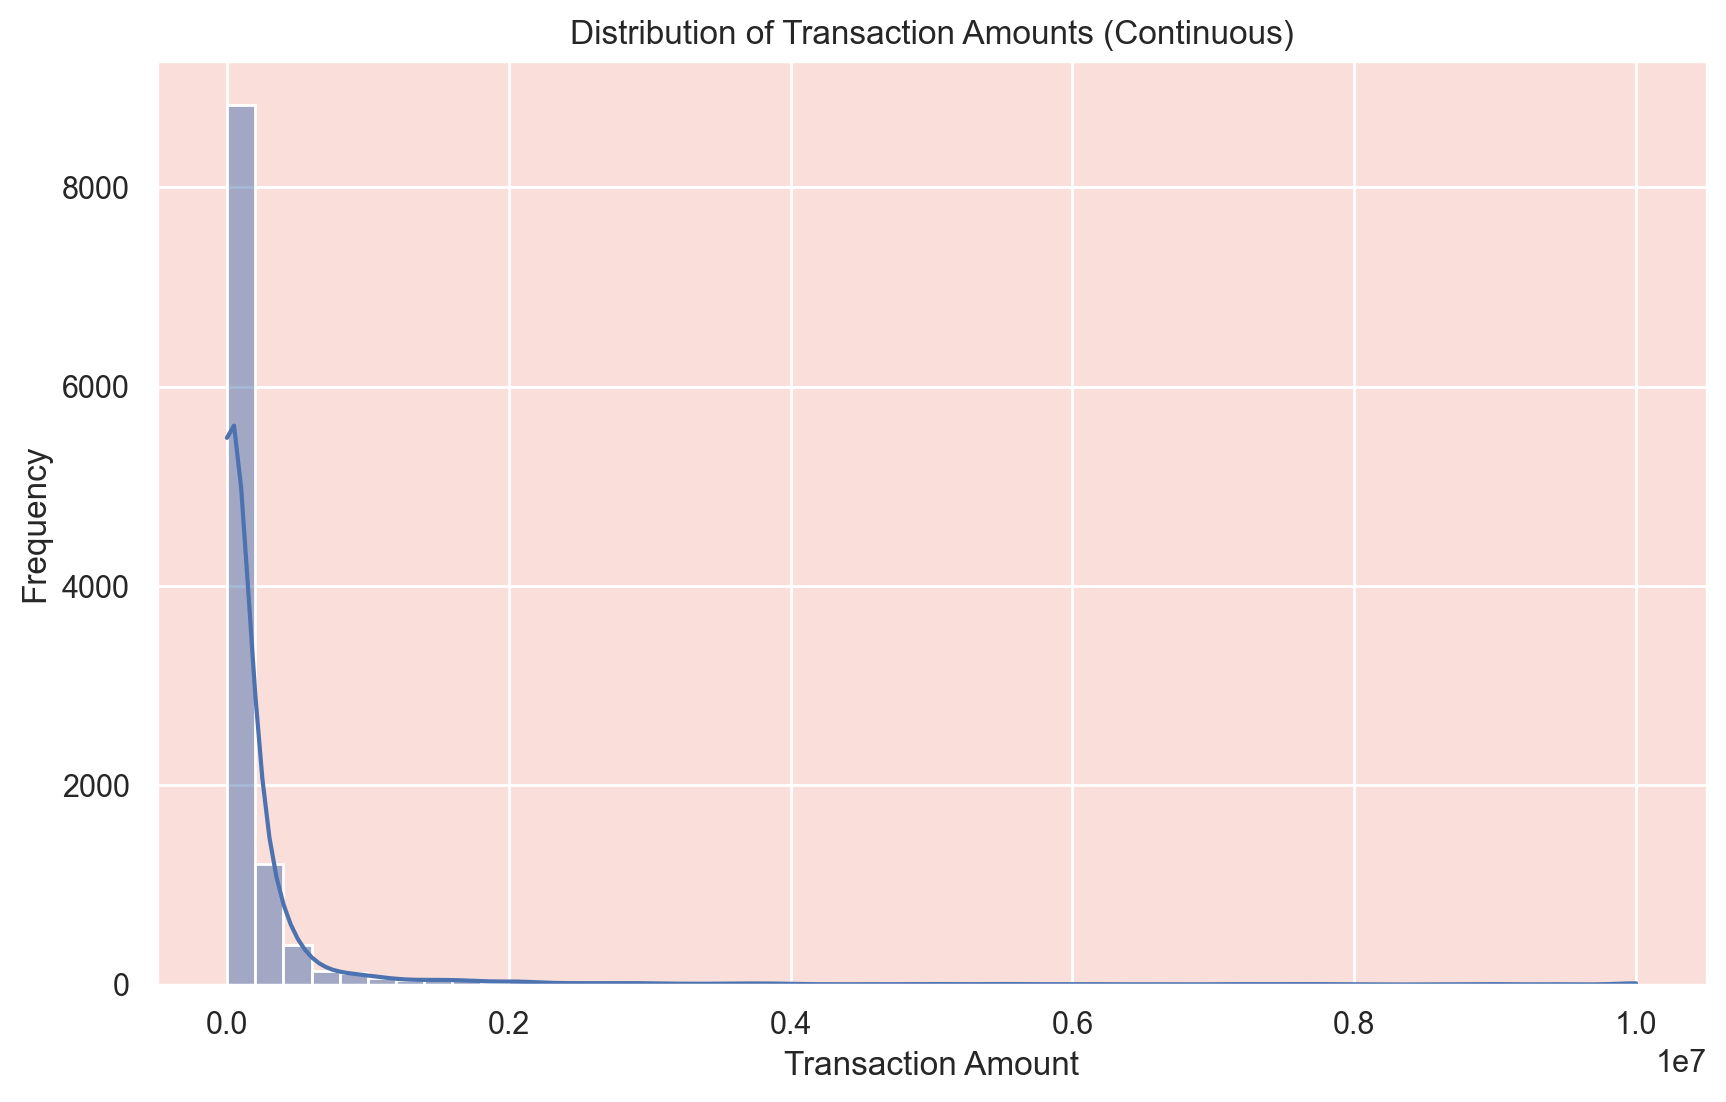

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True, bins=50)
plt.title('Distribution of Transaction Amounts (Continuous)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# 2.  Transaction amount VS Density


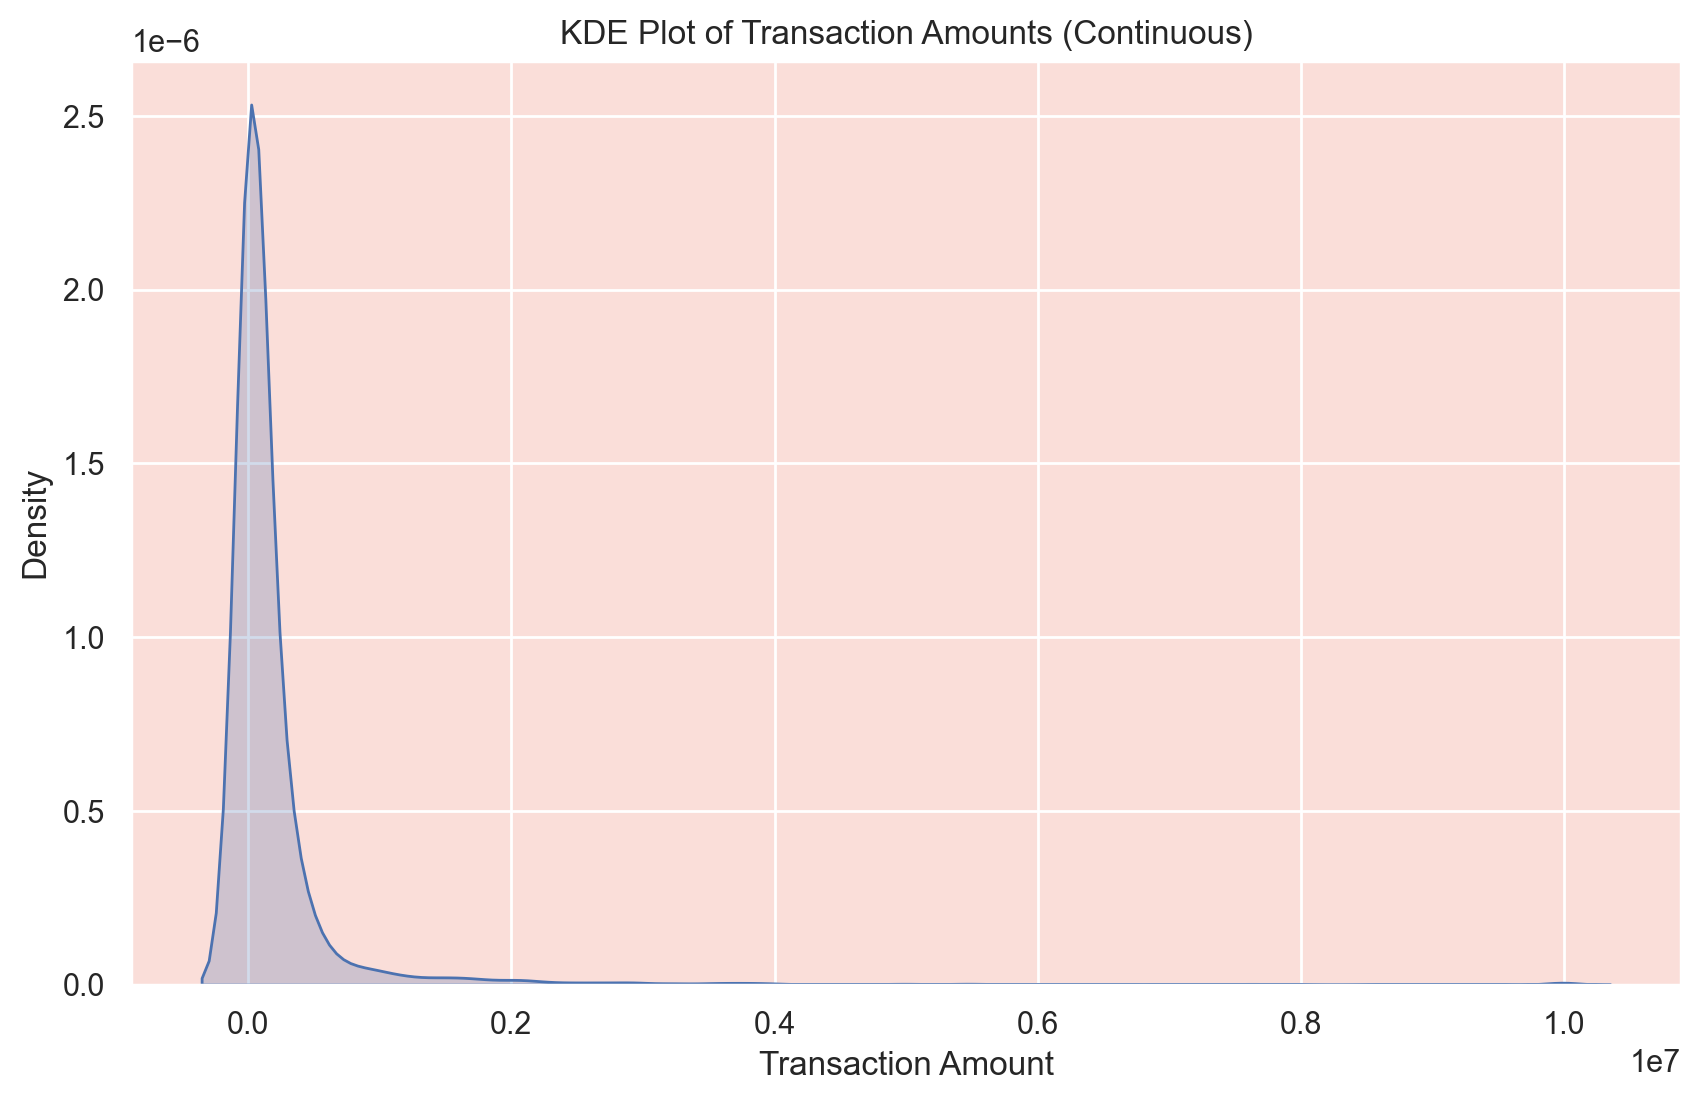

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['amount'], shade=True)
plt.title('KDE Plot of Transaction Amounts (Continuous)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

# Boxplot of Transaction Amount

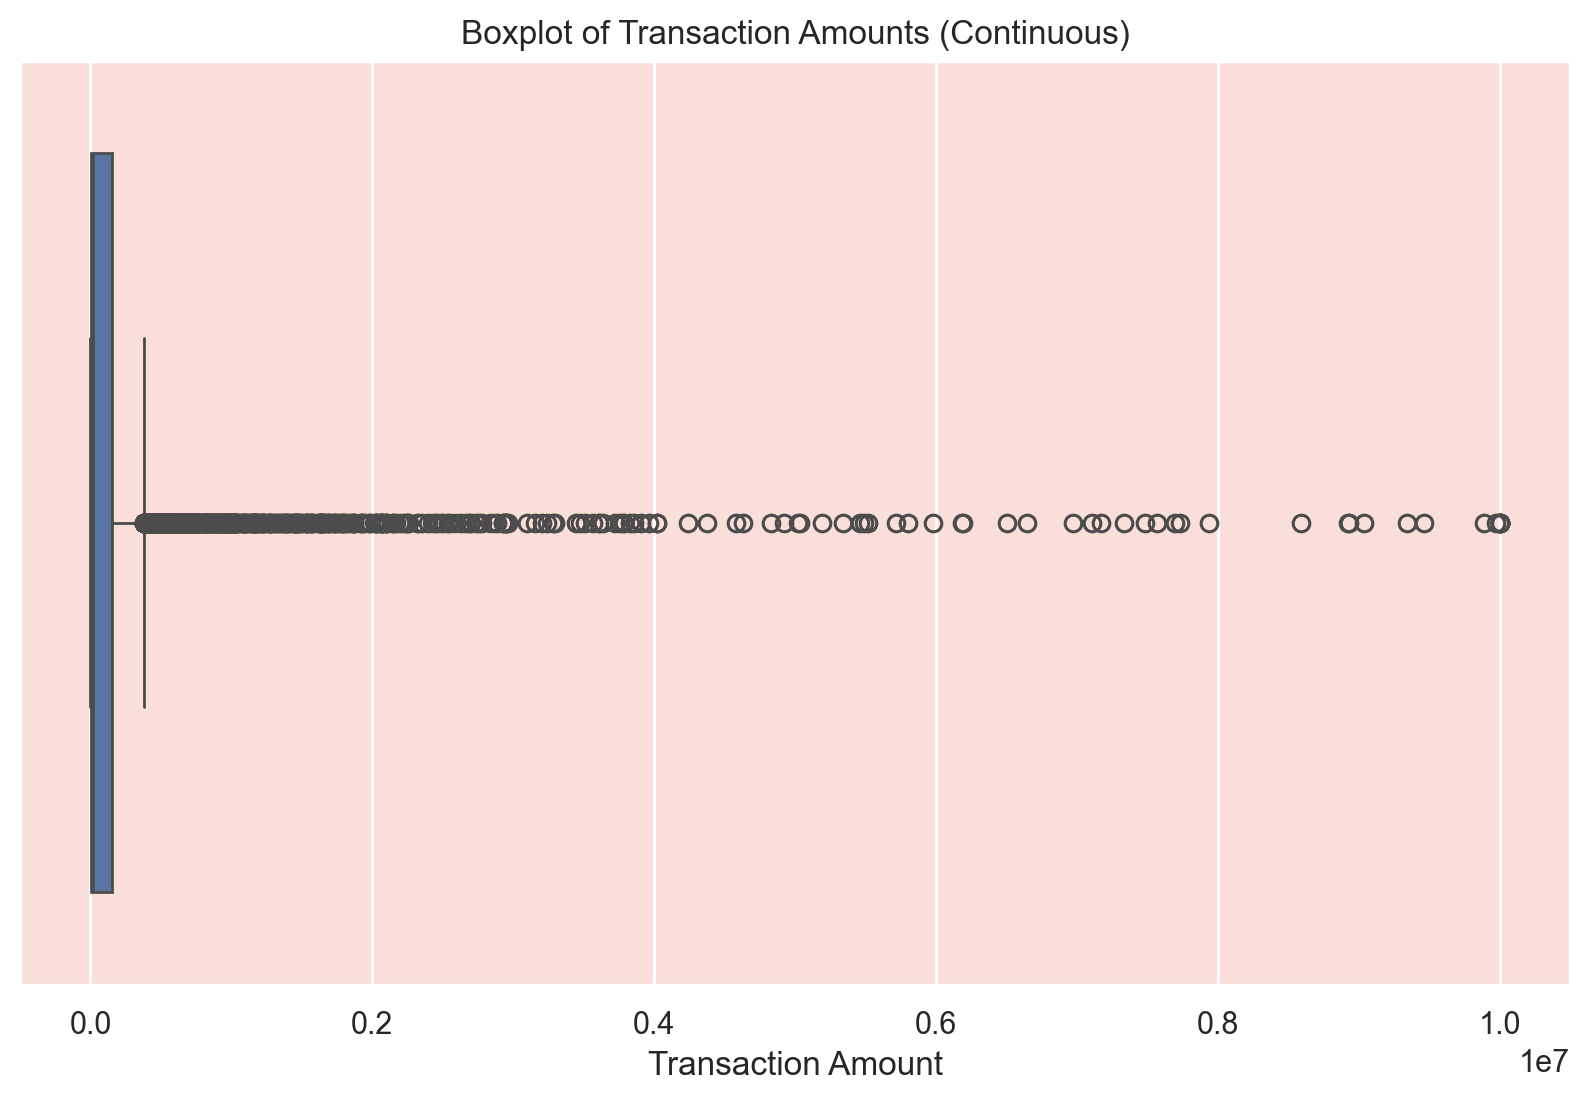

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='amount', data=df)
plt.title('Boxplot of Transaction Amounts (Continuous)')
plt.xlabel('Transaction Amount')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

<h2 align="left"><font color=brown>Inferences:</font></h2>

<h3><u>1. Univariate Analysis</u></h3>

* __Transaction Amount (`amount`)__: The distribution of transaction amounts is right-skewed, with most transactions concentrated at lower values. The mean transaction amount is around $12,708.84 with a standard deviation of $46,210.68. There are some significant outliers, as seen in the boxplot.

* __Original Balance (`oldbalanceOrg`)__: The original balance before the transaction shows a similar right-skewed distribution, indicating that most transactions involve accounts with lower balances. The mean original balance is approximately $8,367.42 with a standard deviation of $4,579.92.

* __Transaction Type (`type`)__: The count plot shows that the majority of transactions are of the type `CASH_OUT` and `PAYMENT`. Other types like `TRANSFER` and `DEBIT` occur less frequently.

* __Fraudulent Transactions (`isFraud`)__: The pie chart reveals that fraudulent transactions make up a small proportion of the dataset, indicating that fraud is relatively rare.

<br>

<a id="cat_uni"></a>
### <b><span style='color:#ff826e'>Step 4.1.2 |</span><span style='color:brown'> Categorical Variables Univariate Analysis</span></b>  

# 1. Transaction Type VS Count

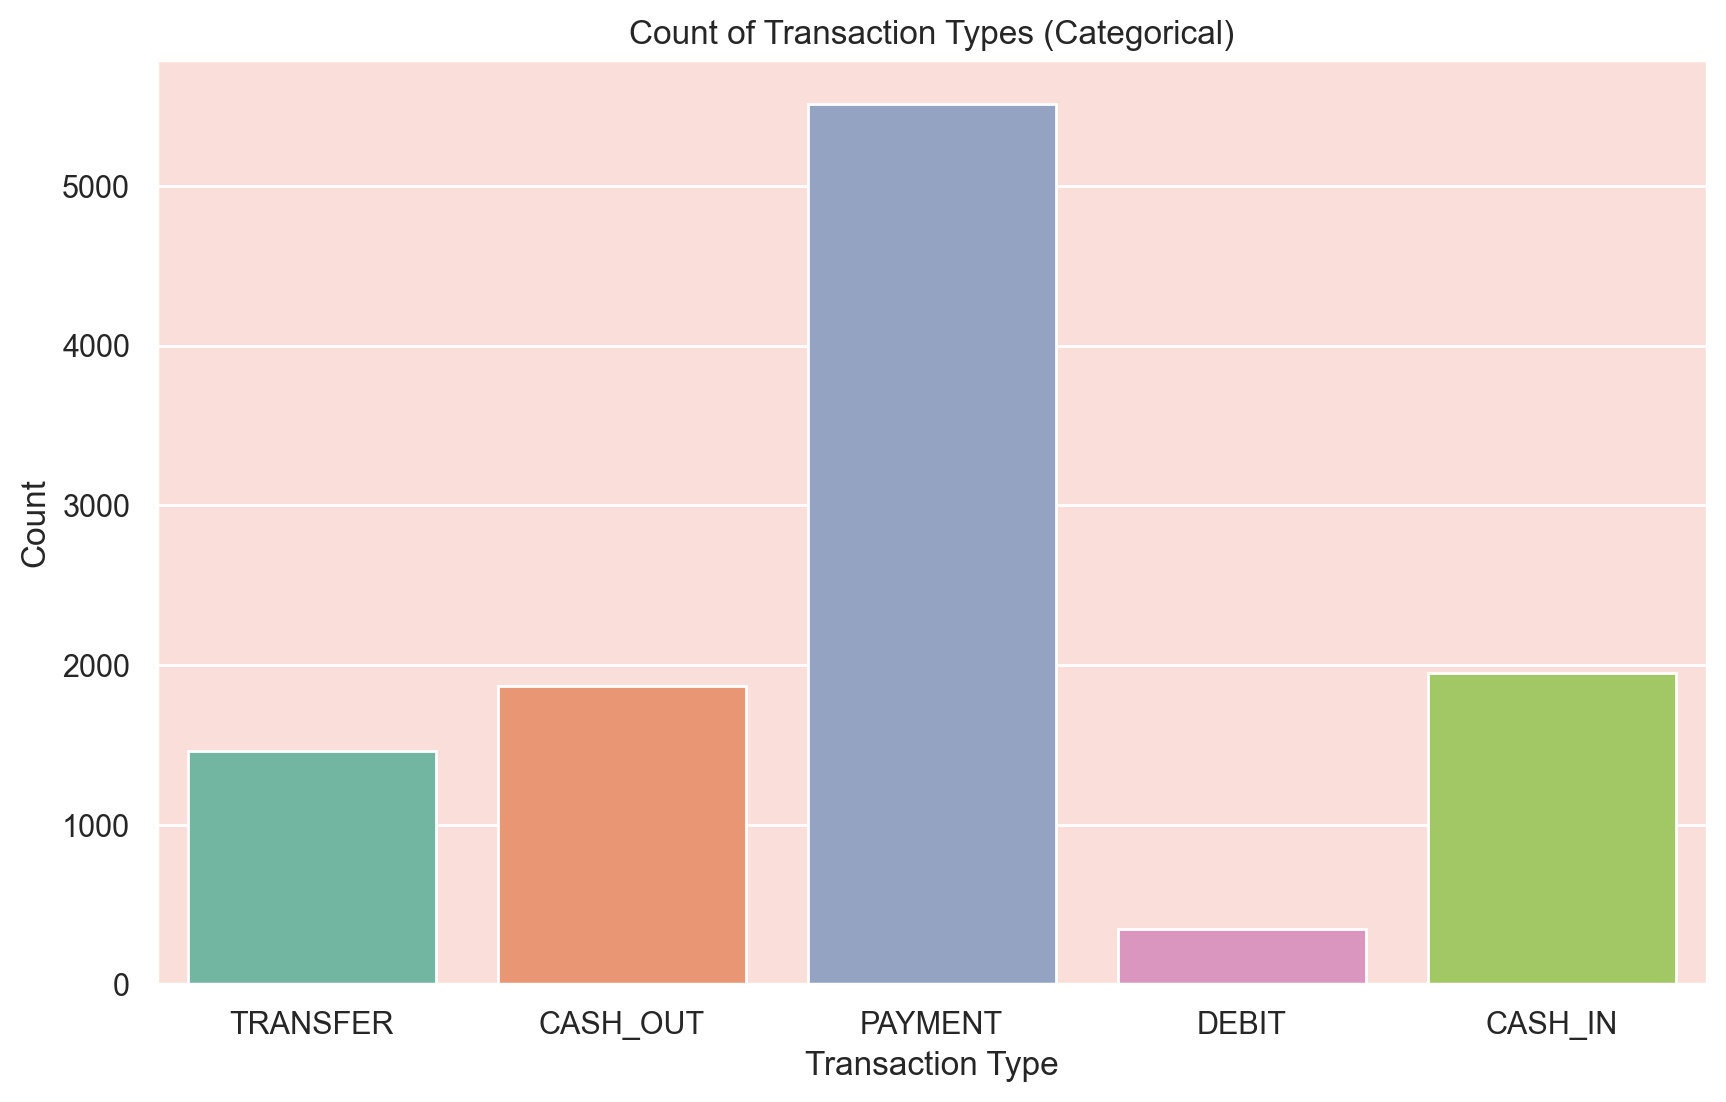

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Count of Transaction Types (Categorical)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# 2. Proportion of Fraudulent VS Non-Fraudulent Transactions

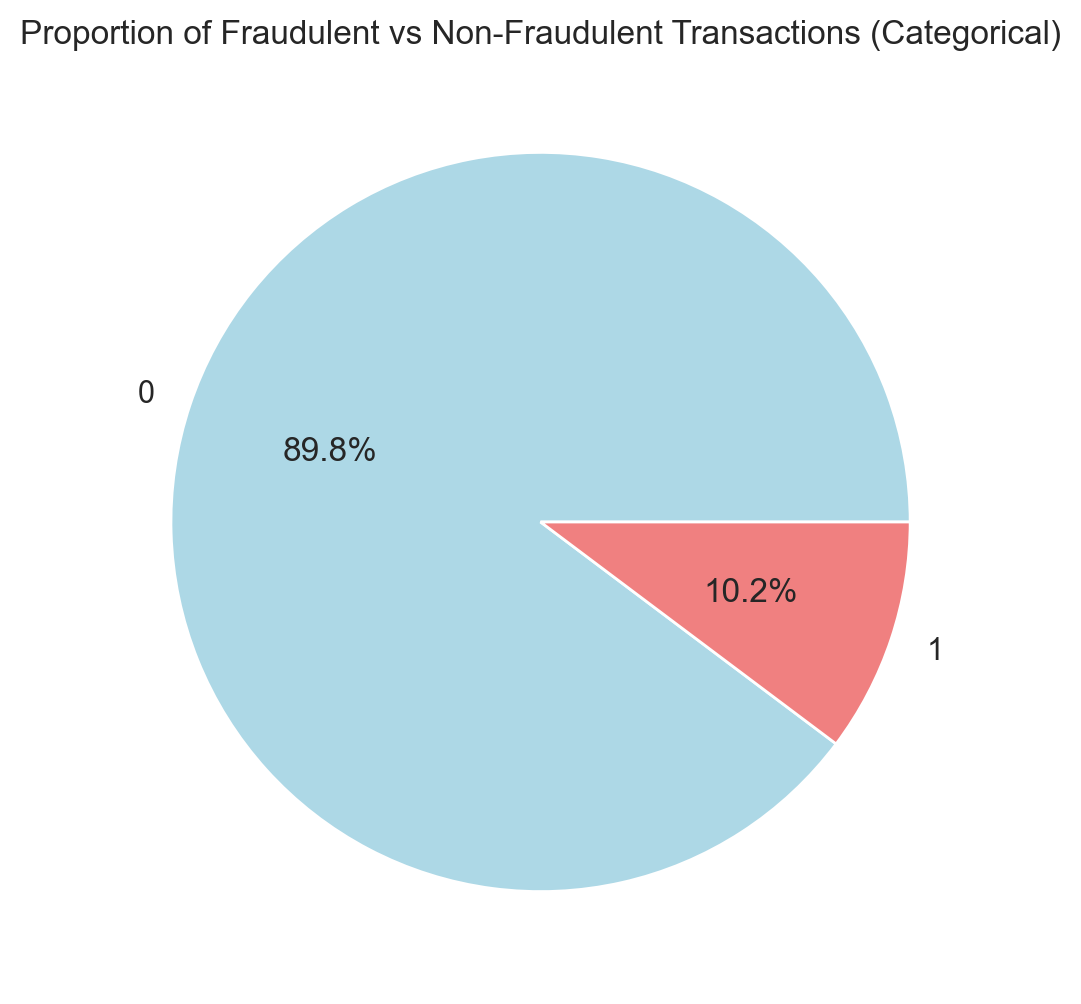

In [14]:
plt.figure(figsize=(10, 6))
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions (Categorical)')
plt.ylabel('')
plt.show()

____
<a id="bivariate"></a>
# <b><span style='color:#ff826e'>Step 4.2 |</span><span style='color:brown'> Bivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">
    
I am going to visualize using three types of charts: 

* __Continuous vs Continuous__: Scatter and hexbin plots explore the relationship between two continuous variables.

* __Continuous vs Categorical__: Boxplots and violin plots compare continuous data across categorical groups.

* __Categorical vs Categorical__: Stacked bar plots and mosaic plots compare categories.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

Explanation of Each Plot

* __Correlation Heatmap__: Understand the correlation between numerical variables.

* __Scatter Plot__: Visualize the relationship between transaction amount and original balance with fraud status highlighted.

* __Boxplot__: Compare the distribution of transaction amounts across different transaction types

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.2.1 |</span><span style='color:brown'> Continuous vs Continuous</span></b>  

# 1. Scatter Plot of Transaction Amount VS Original Balance

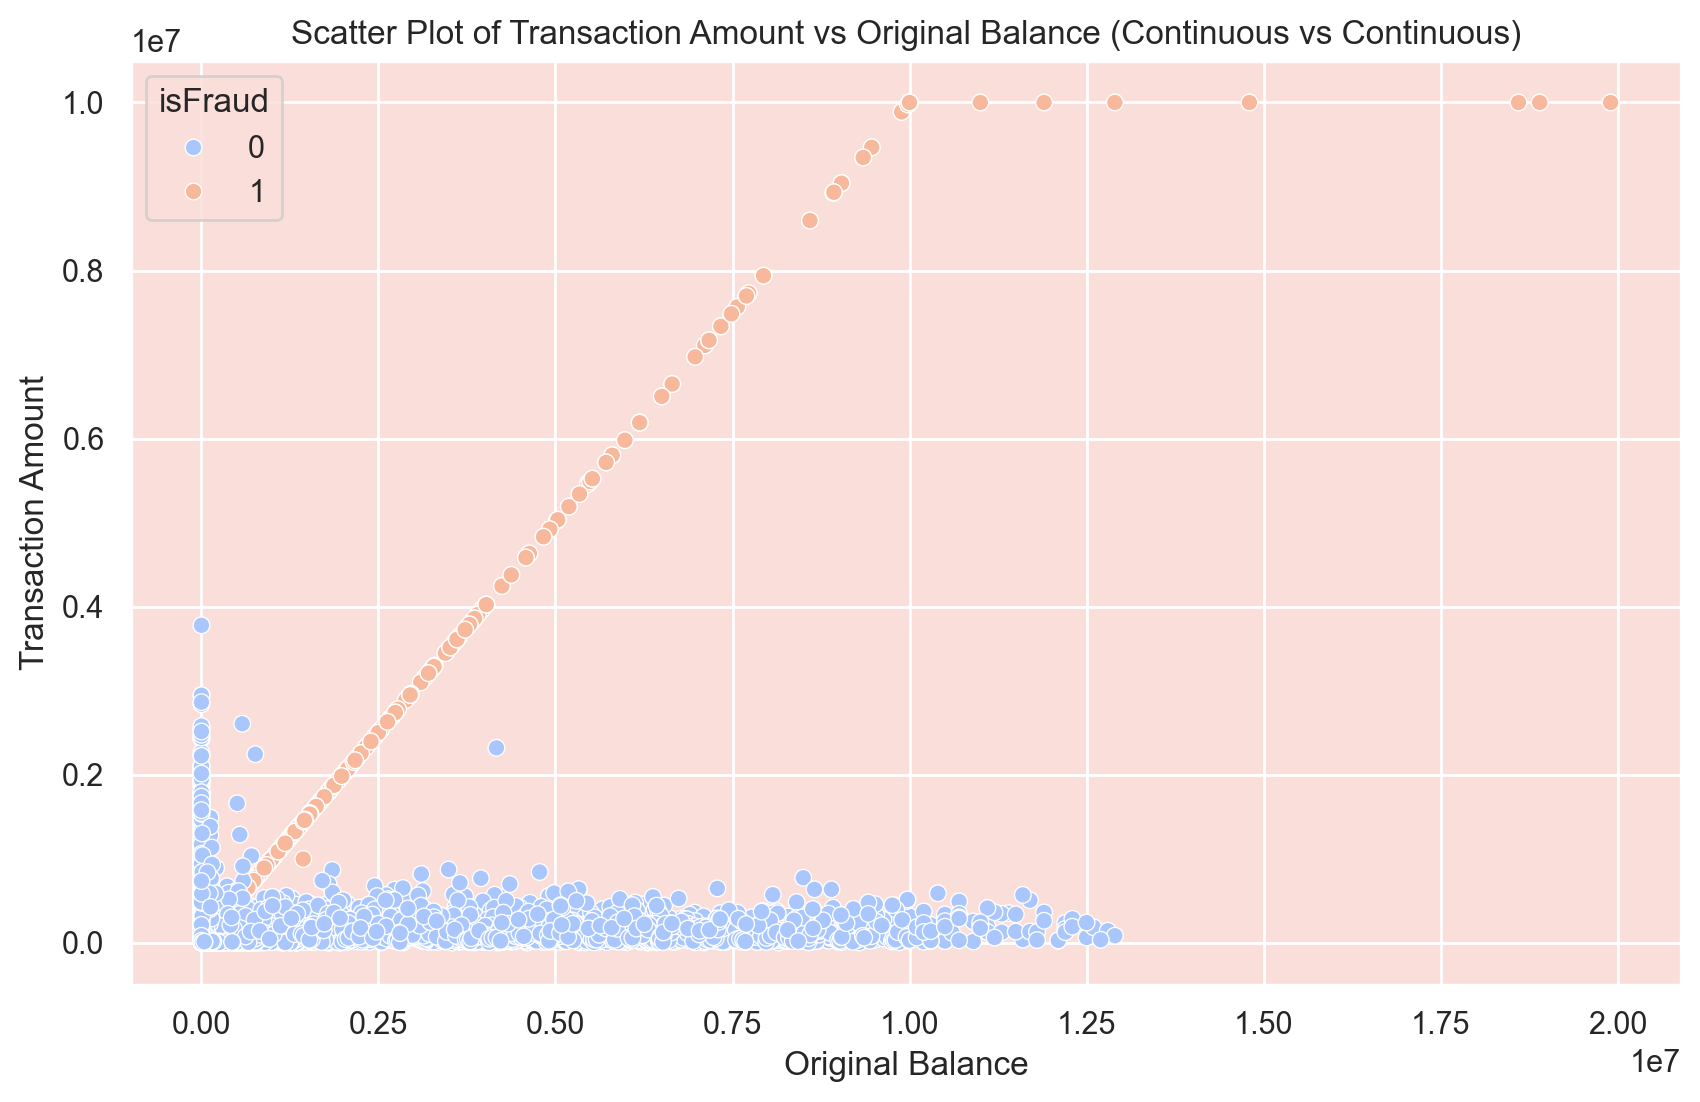

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df, hue='isFraud', palette='coolwarm')
plt.title('Scatter Plot of Transaction Amount vs Original Balance (Continuous vs Continuous)')
plt.xlabel('Original Balance')
plt.ylabel('Transaction Amount')
plt.show()

# 2. Hexbin Plot of Transaction Amount vs Original Balance 

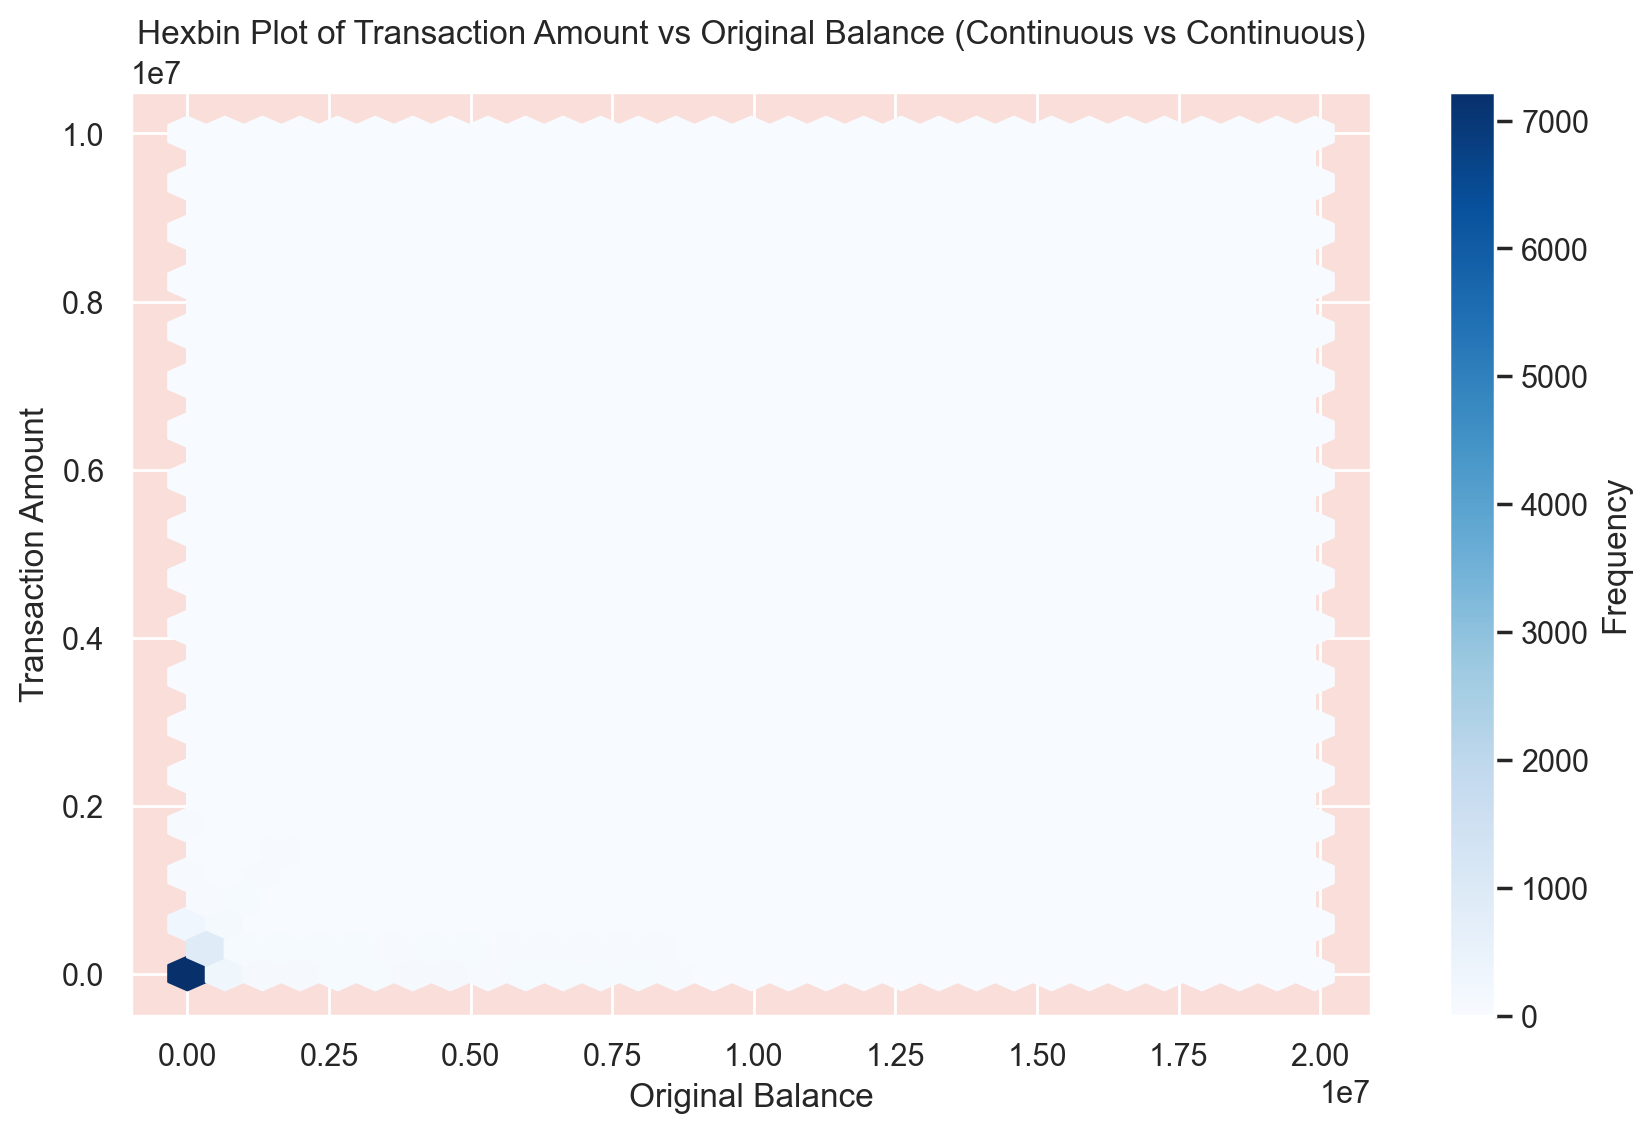

In [16]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['oldbalanceOrg'], df['amount'], gridsize=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot of Transaction Amount vs Original Balance (Continuous vs Continuous)')
plt.xlabel('Original Balance')
plt.ylabel('Transaction Amount')
plt.show()

<a id="cat_target"></a>
### <b><span style='color:#ff826e'>Step 4.2.2 |</span><span style='color:brown'> Continuous  vs Categorical</span></b>  

# 1. Boxplot of Transaction Amount by Transaction Type

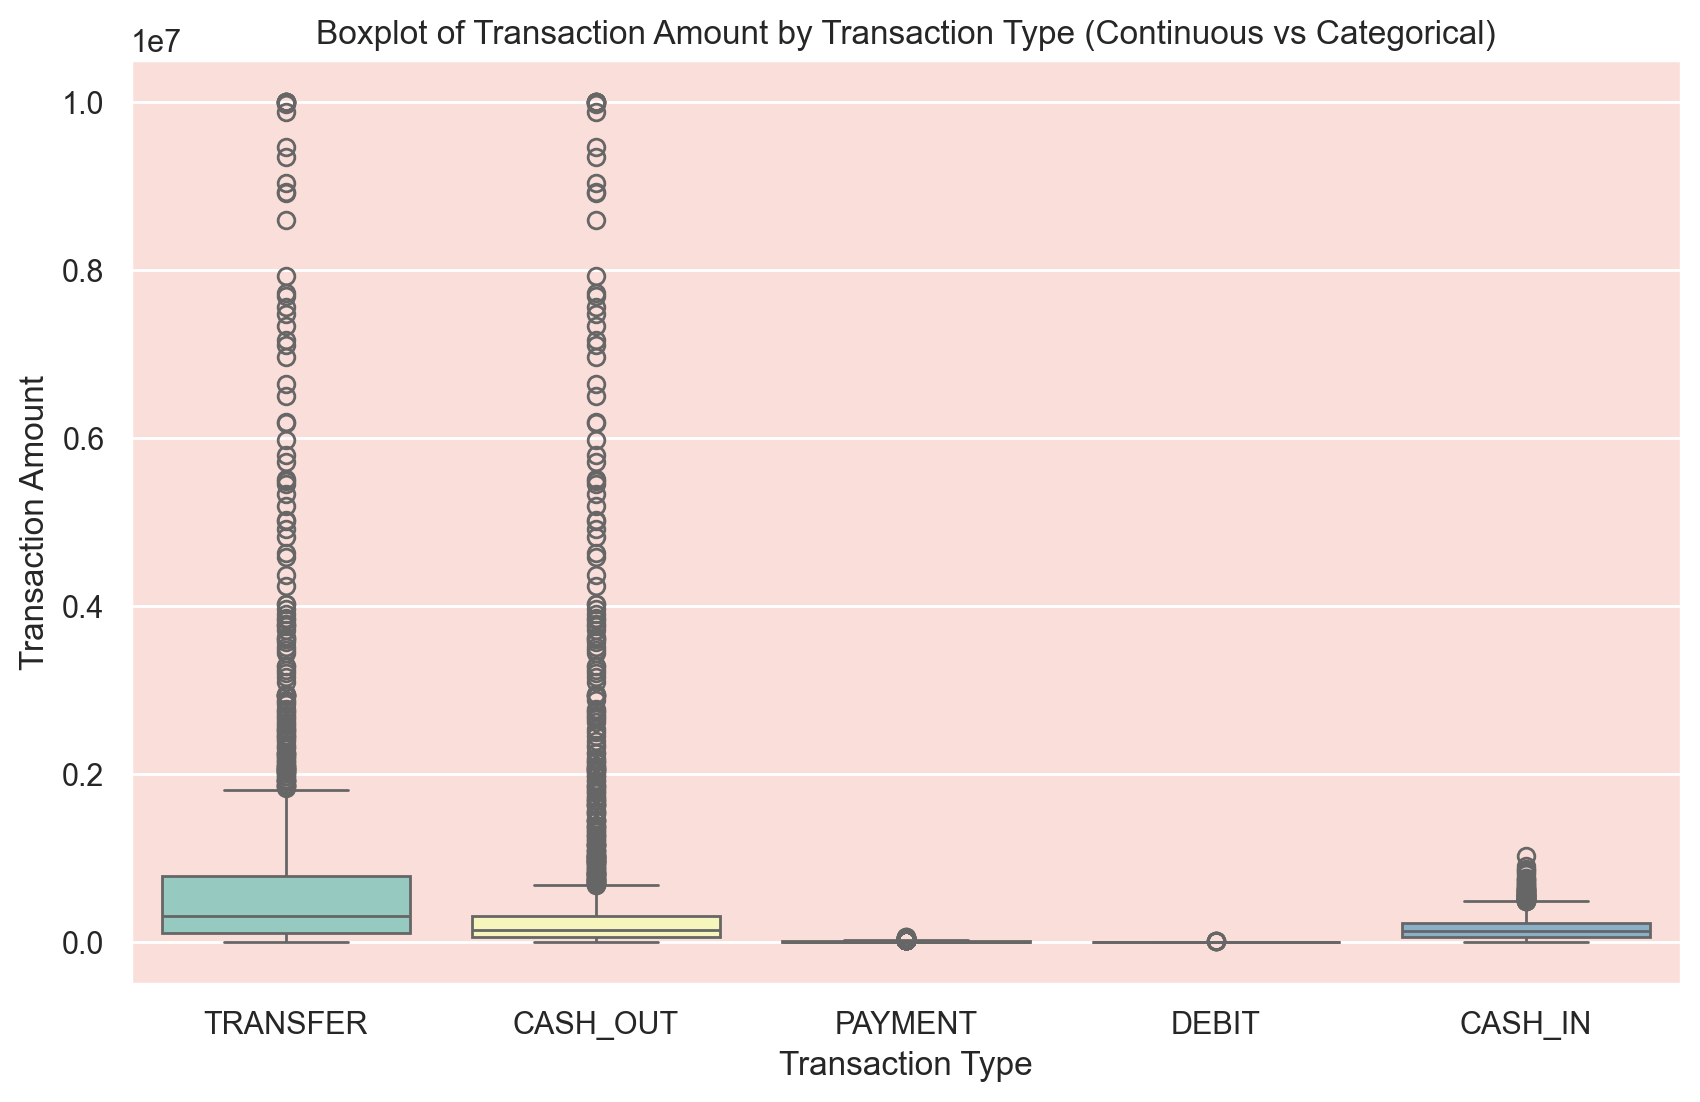

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=df, palette='Set3')
plt.title('Boxplot of Transaction Amount by Transaction Type (Continuous vs Categorical)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

# 2. Violin Plot of Transaction Amount by Transaction Typ

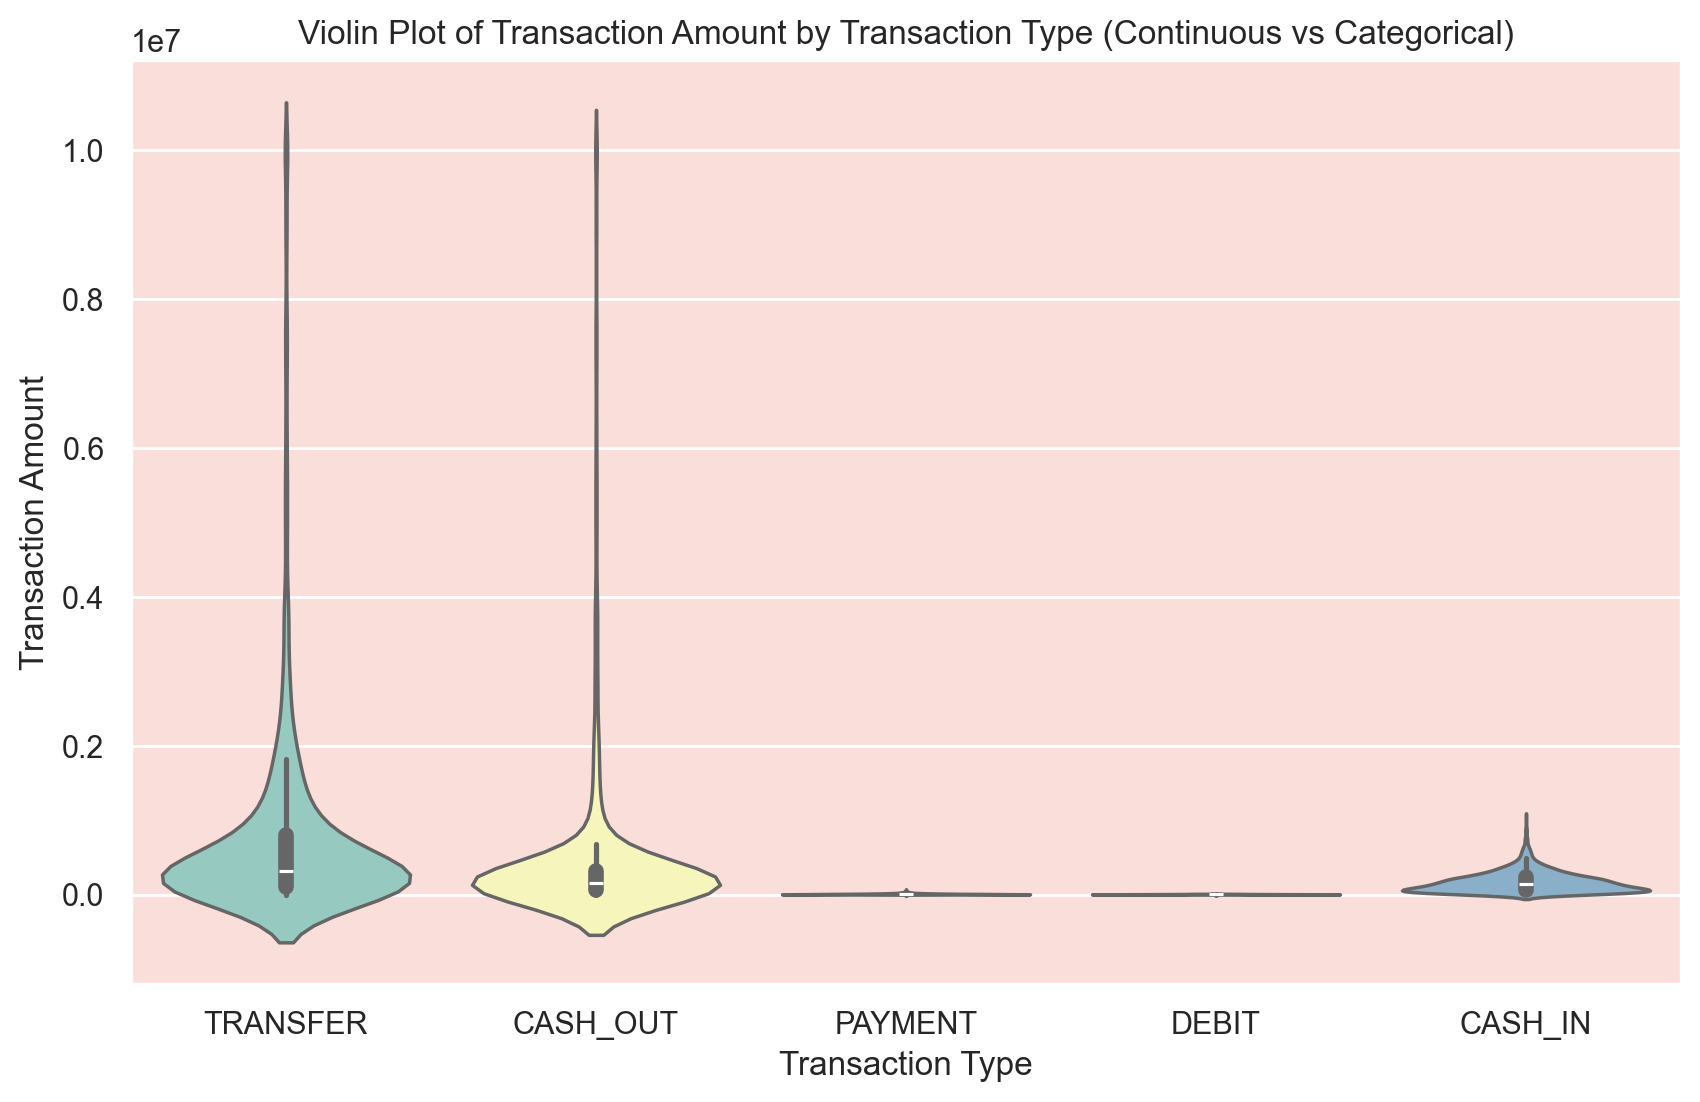

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='amount', data=df, palette='Set3')
plt.title('Violin Plot of Transaction Amount by Transaction Type (Continuous vs Categorical)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

<a id="cat_target"></a>
### <b><span style='color:#ff826e'>Step 4.2.3 |</span><span style='color:brown'>  Categorical vs Categorical</span></b>  

# 1. Stacked Bar Plot of Transaction Type by Fraud Status

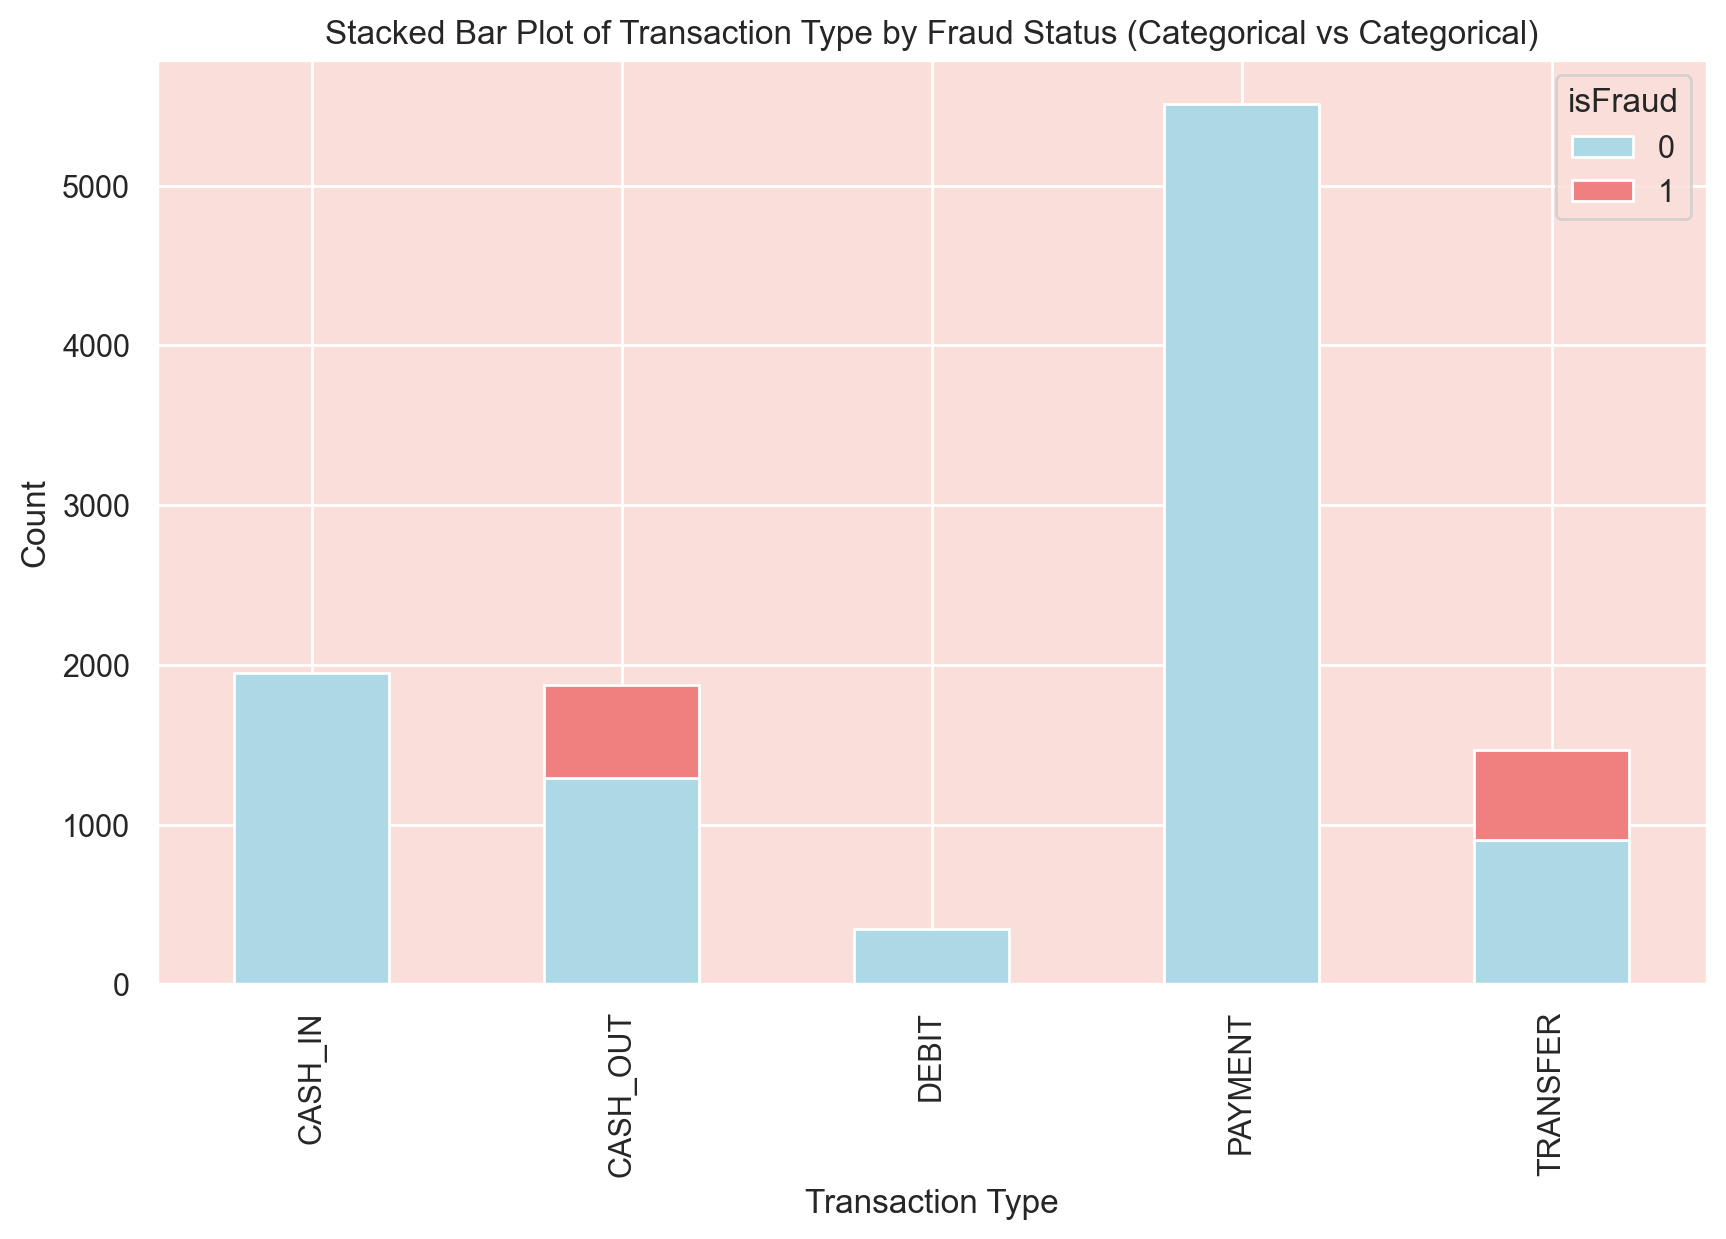

In [19]:
pd.crosstab(df['type'], df['isFraud']).plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], figsize=(10, 6))
plt.title('Stacked Bar Plot of Transaction Type by Fraud Status (Categorical vs Categorical)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# 2. Mosaic Plot of Transaction Type by Fraud Status

<Figure size 2000x1200 with 0 Axes>

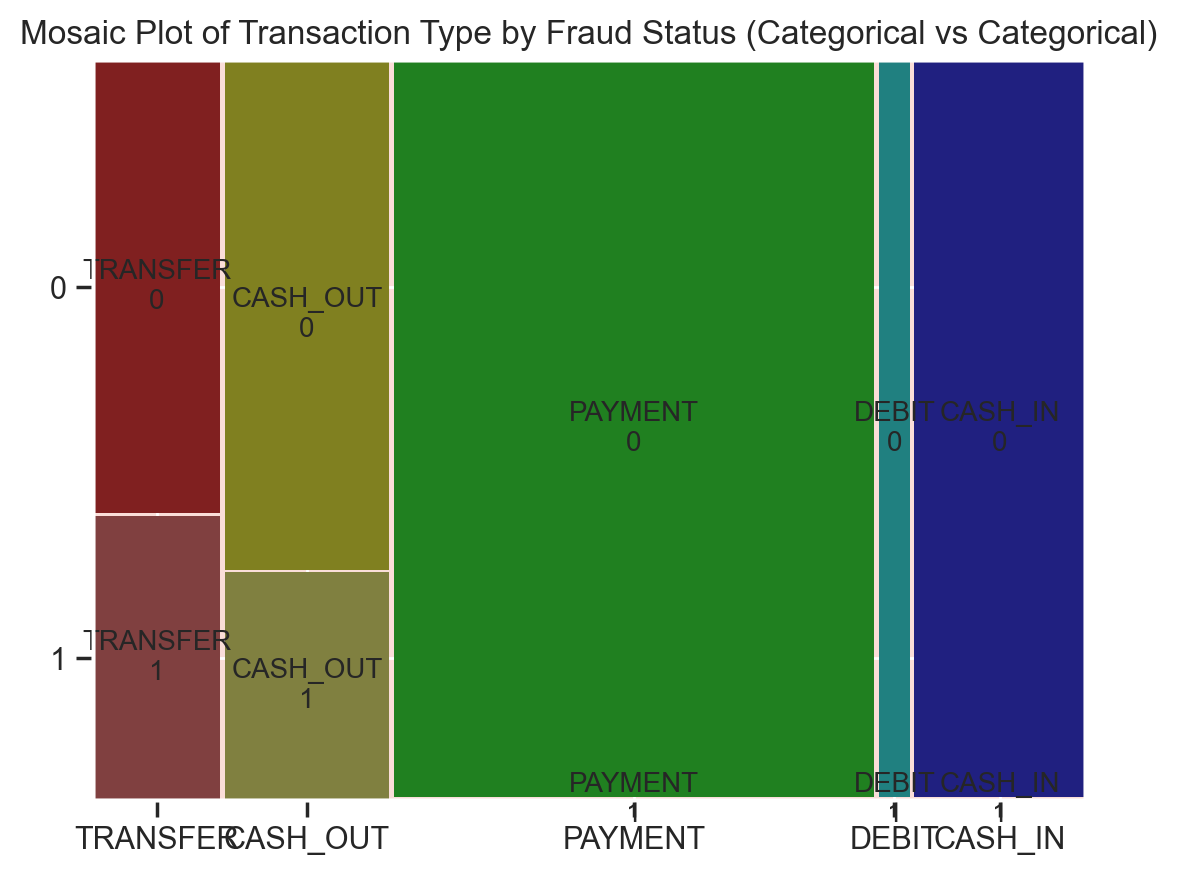

In [20]:
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(10, 6))
mosaic(df, ['type', 'isFraud'], title='Mosaic Plot of Transaction Type by Fraud Status (Categorical vs Categorical)')
plt.show()

____
<a id="bivariate"></a>
# <b><span style='color:#ff826e'>Step 4.3 |</span><span style='color:brown'> Multivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">
    
I am going to visualize using three types of charts: 

* __Continuous Data__: Pair plots explore relationships among multiple continuous variables.

* __Categorical Data__: Grouped boxplots compare continuous data across multiple categorical groups.

* __Mixed Data__: Heatmaps, pair plots with hue, and FacetGrid visualize the interplay between continuous and categorical variables.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

 __Explanation of Each Plot__

* __Pair Plot__: Explore pairwise relationships between multiple variables with fraud status as a differentiator.

* __Heatmap__: Detailed correlation between all numerical variables.

* __Facet Grid__: Analyze how transaction amounts vary across transaction types and fraud status.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.3.1 |</span><span style='color:brown'> Continuous Data</span></b>  

# Pair Plot of continuous features like amount , oldbalanceOrg, newbalanceOrig, isFraud

<Figure size 2000x1200 with 0 Axes>

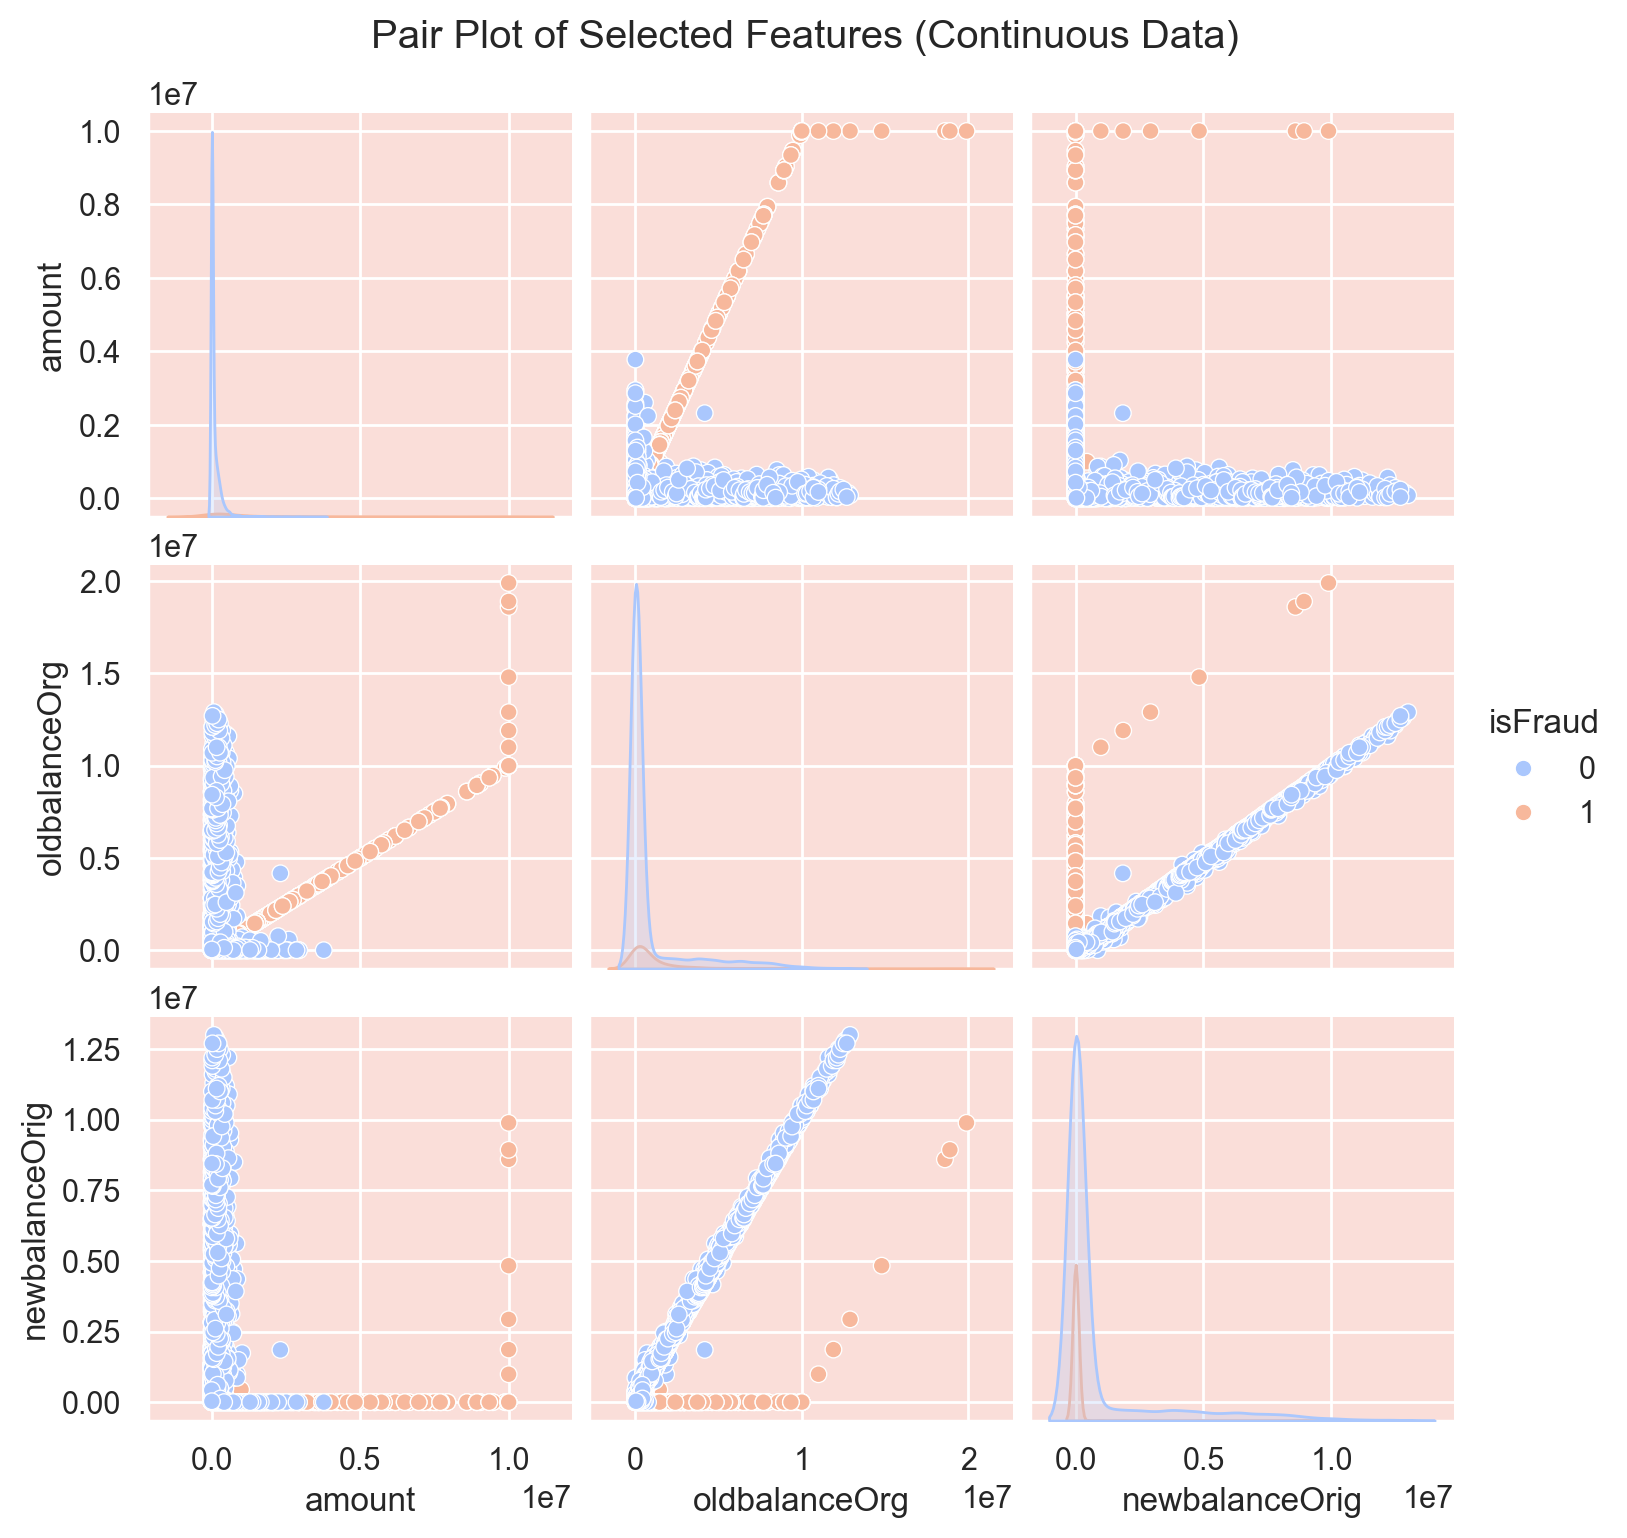

In [21]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']], hue='isFraud', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features (Continuous Data)', y=1.02)
plt.show()

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.3.2 |</span><span style='color:brown'> Categorical Data</span></b>  

# Grouped Boxplot of Transaction Amount by Type and Fraud Status

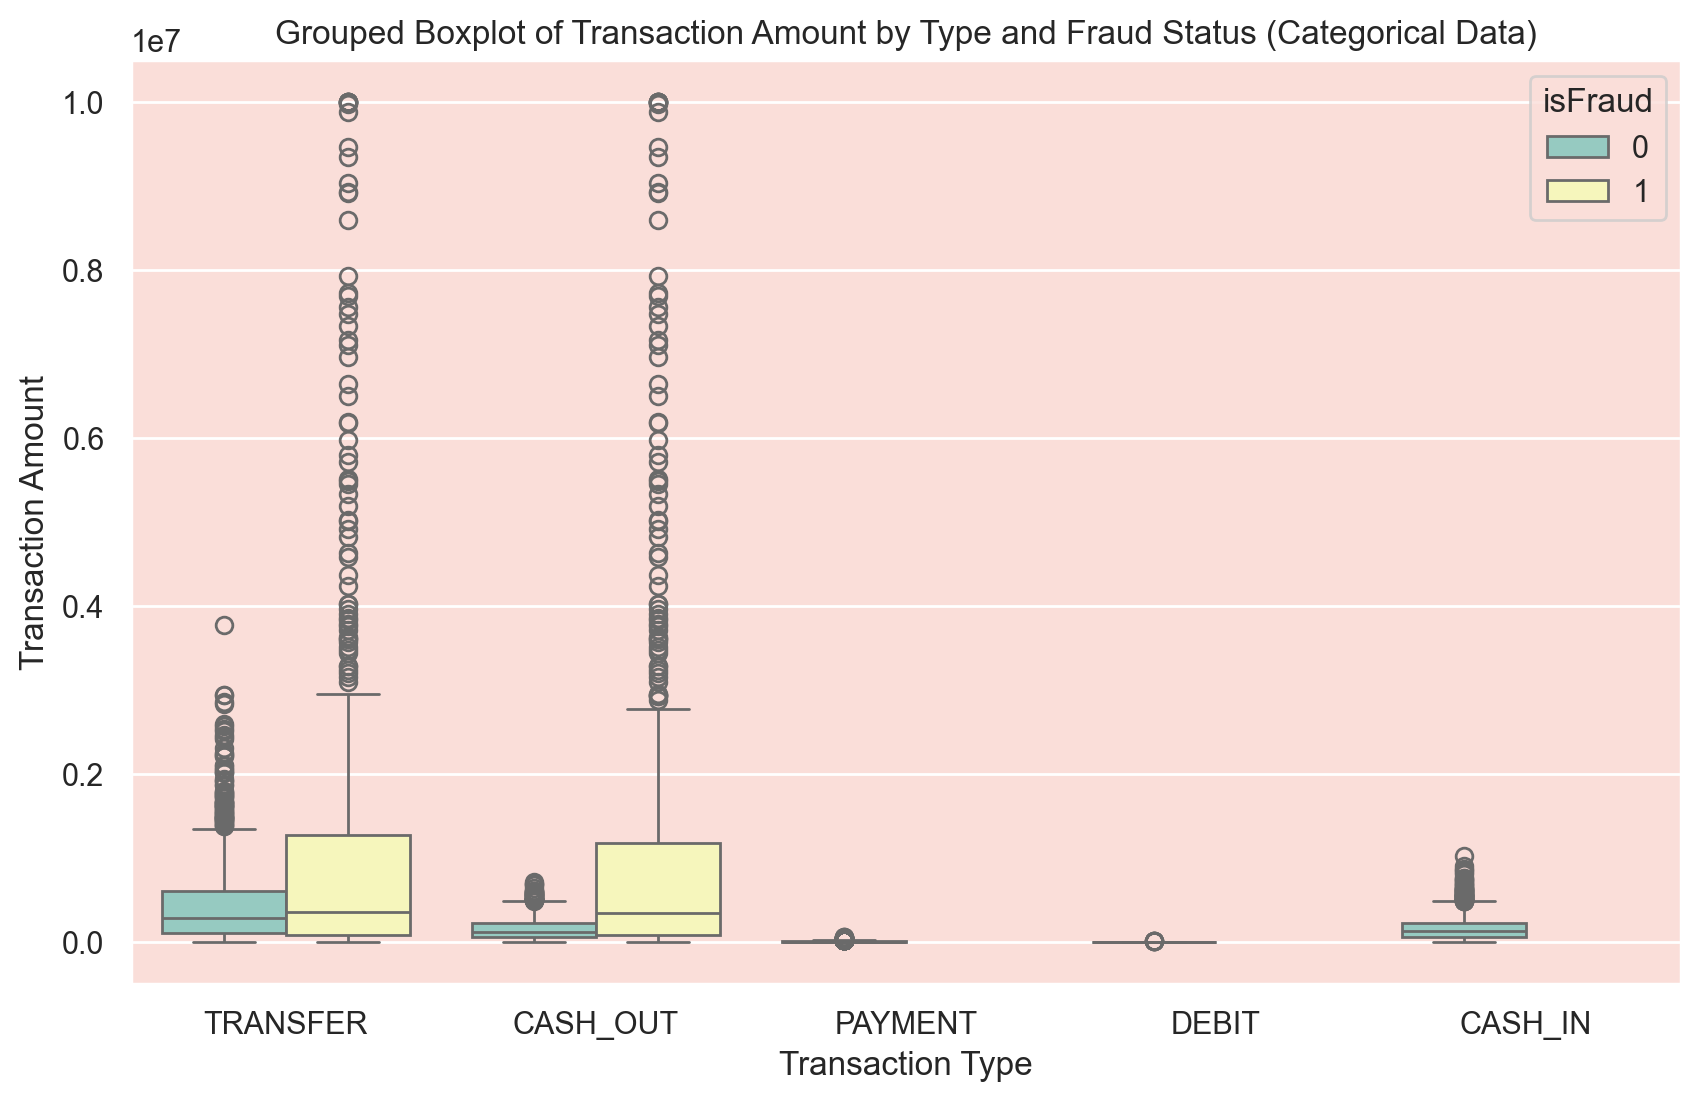

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df, palette='Set3')
plt.title('Grouped Boxplot of Transaction Amount by Type and Fraud Status (Categorical Data)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.3.3 |</span><span style='color:brown'> Mix Data</span></b>  

# 1. Heatmap of Correlations

In [23]:
continuous_features

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

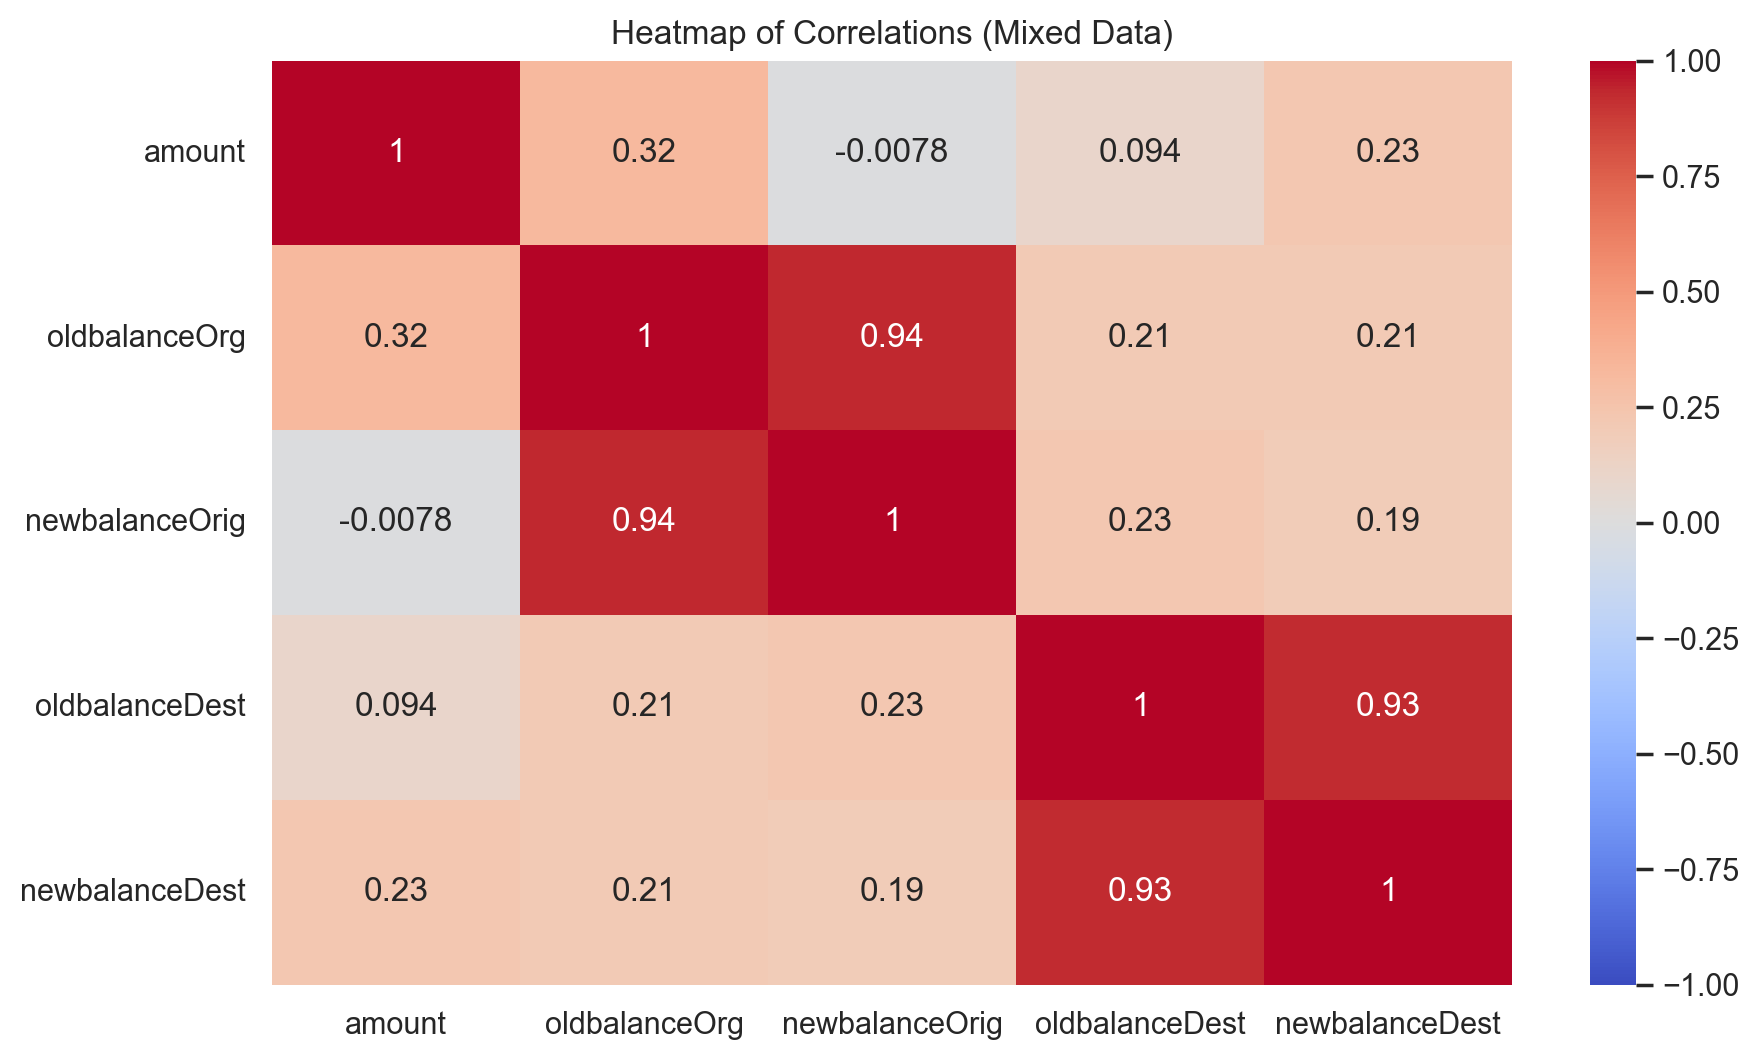

In [24]:
continuous_clm = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
plt.figure(figsize=(10, 6))
corr = continuous_clm.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlations (Mixed Data)')
plt.show()

 # 2. Pair Plot of Selected Features with Fraud Status 

<Figure size 2000x1200 with 0 Axes>

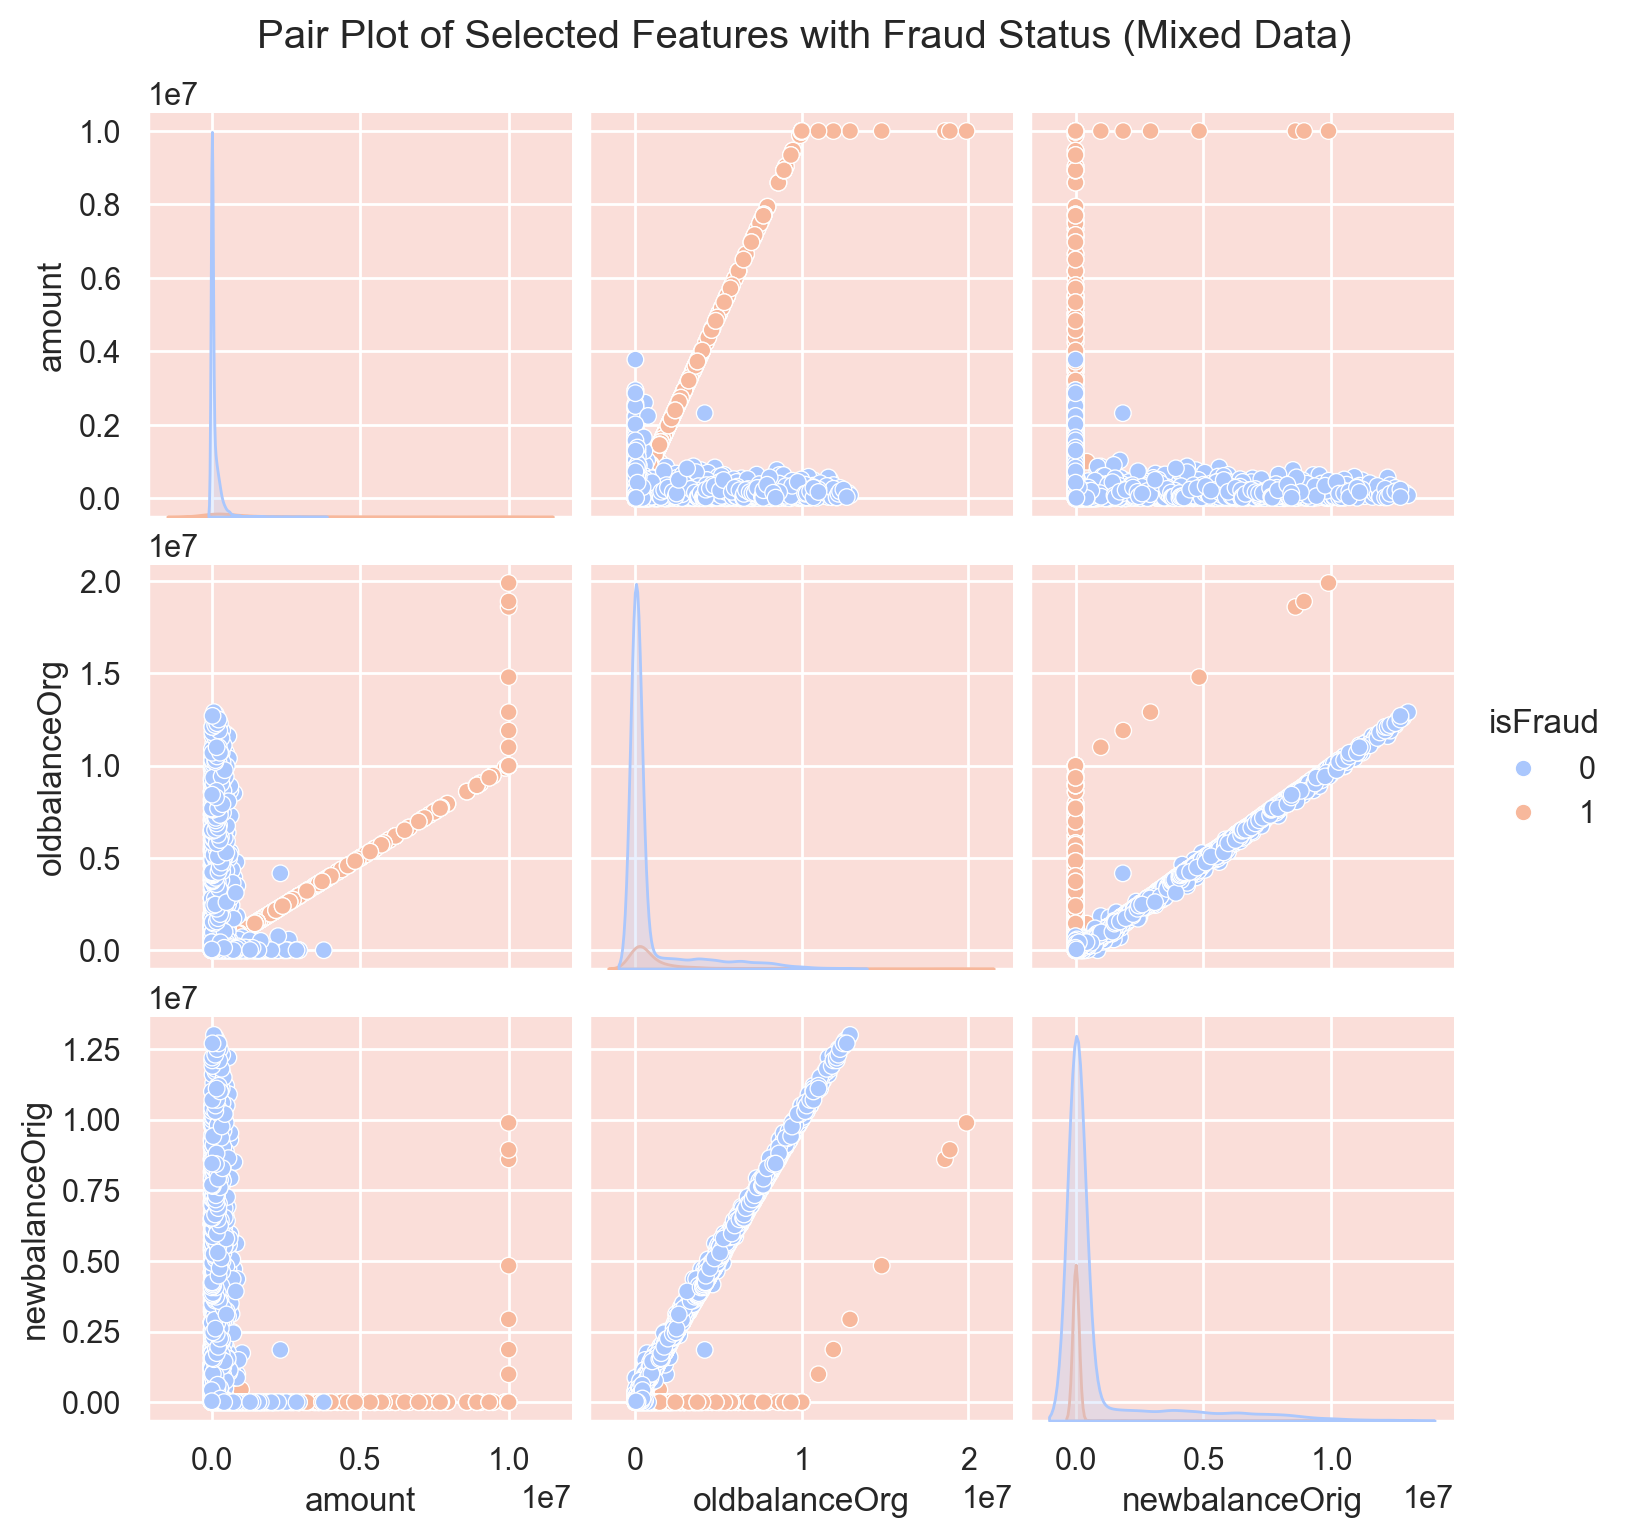

In [25]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']], hue='isFraud', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features with Fraud Status (Mixed Data)', y=1.02)
plt.show()

# 3. Facet Grid of Transaction Amount by Type and Fraud Status

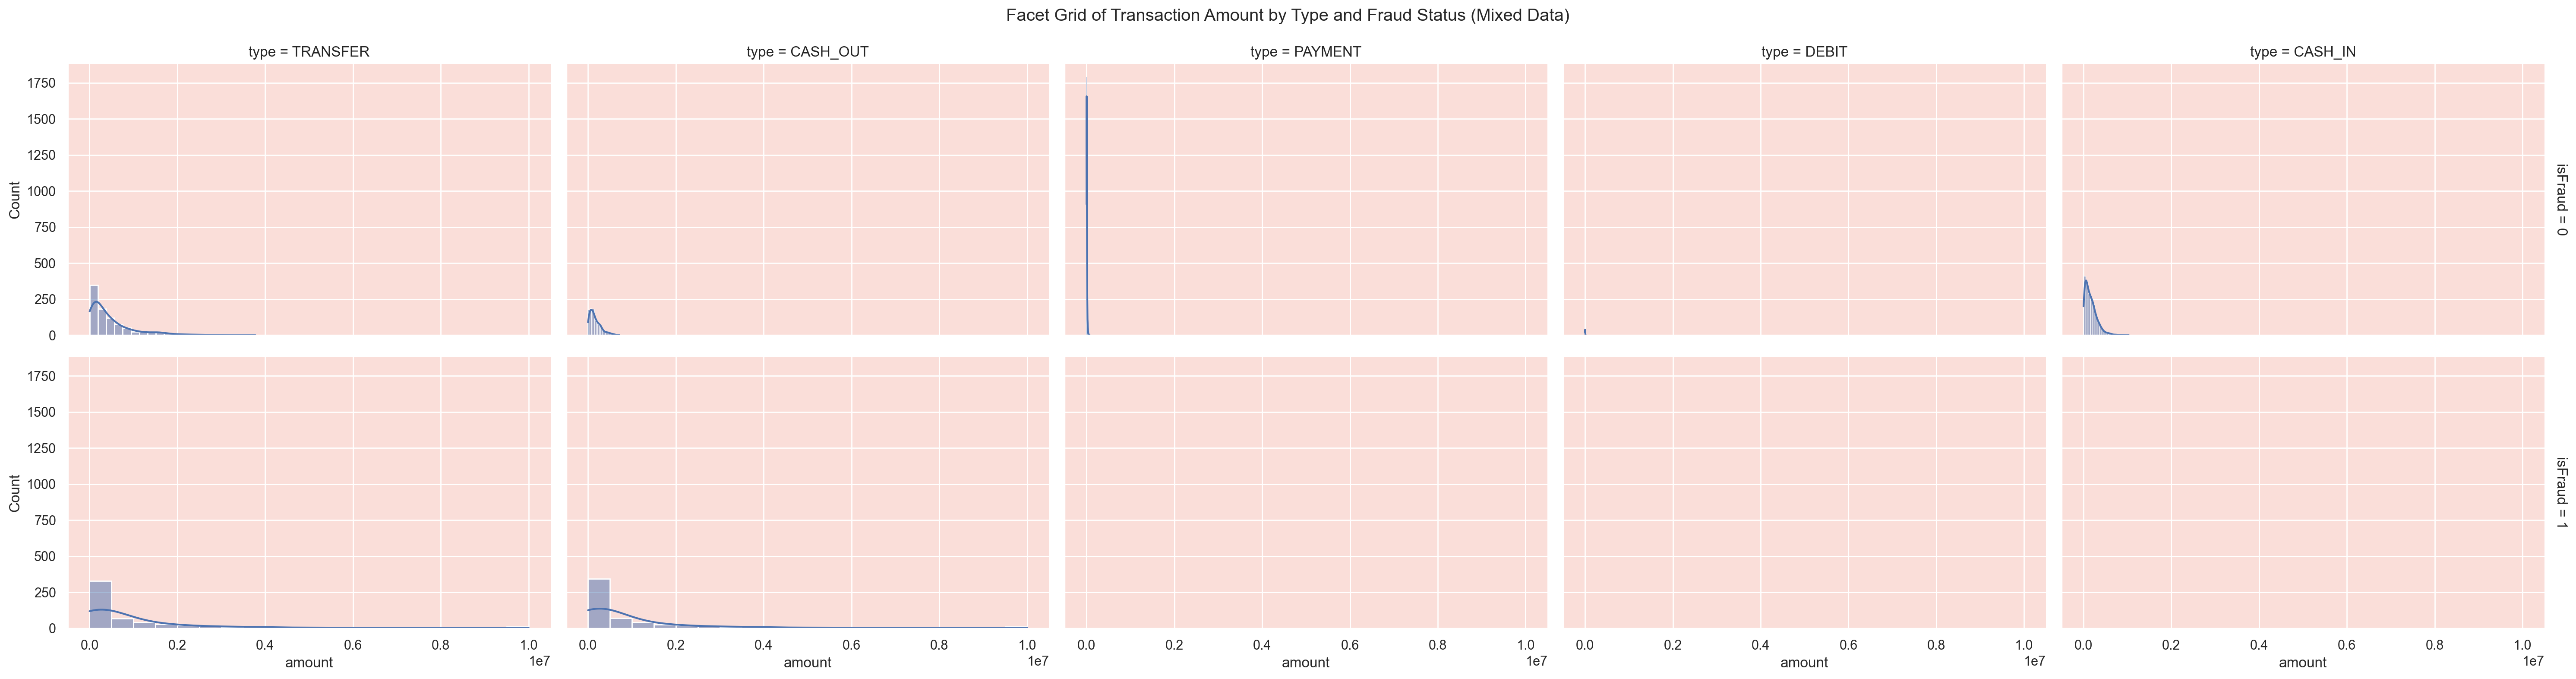

In [26]:
g = sns.FacetGrid(df, col='type', row='isFraud', margin_titles=True, height=4, aspect=1.5)
g.map(sns.histplot, 'amount', bins=20, kde=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Grid of Transaction Amount by Type and Fraud Status (Mixed Data)')
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color:#ff826e'>Step 5.1 |</span><span style='color:brown'> Irrelevant Features Removal Bivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; font-size:115%;color:black; text-align:left">

All features in the dataset appear to be relevant based on our __EDA__. No columns seem redundant or irrelevant. Thus, we'll retain all features, ensuring no valuable information is lost, especially given the dataset's small size.

In [27]:
df = df.drop(['nameOrig','nameDest'],axis=1)

In [28]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
1,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
2,1,TRANSFER,2806.00,2806.00,0.00,0.00,0.00,1
3,1,CASH_OUT,2806.00,2806.00,0.00,26202.00,0.00,1
4,1,TRANSFER,20128.00,20128.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,433084.38,426690.68,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,426690.68,127891.14,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,127891.14,0.00,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,13918.00,12823.97,0.00,0.00,0


____
<a id="missing"></a>
# <b><span style='color:#ff826e'>Step 5.2 |</span><span style='color:brown'> Missing Value Treatment</span></b>

In [29]:
# Check for missing values in the dataset
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color : black;font-size:115%; text-align:left">
    
Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

____
<a id="outlier"></a>
# <b><span style='color:#ff826e'>Step 5.3 |</span><span style='color:brown'> Outlier Treatment</span></b>


<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

I am going to check for outliers using the __IQR method__ for the continuous features:

In [30]:
continuous_features

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [31]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

amount            1172
oldbalanceOrg     2195
newbalanceOrig    2245
oldbalanceDest    1921
newbalanceDest    2214
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">
    
Upon identifying outliers for the specified continuous features, we found the following:

* __`amount`__: 1172 outliers
* __`oldbalanceOrg`__: 2195 outliers
* __`newbalanceOrig`__: 2245 outlier
* __`oldbalanceDest`__: 1921 outliers
* __`newbalanceDest`__: 2214 outliers

In [32]:

df_modified = df.drop('isFraud', axis=1)

In [33]:
# Imputing outliers with median  
def replace_outliers_with_median(df_modified):
    for column in df_modified.columns:
        if df[column].dtype in ['int64', 'float64']:  # Apply only to numerical columns
            Q1 = df_modified[column].quantile(0.25)
            Q3 = df_modified[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with median
            median = df_modified[column].median()
            df_modified[column] = df_modified[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df_modified

# Apply the function to the loaded DataFrame
df_imputed = replace_outliers_with_median(df_modified)

In [34]:
Q1 = df_modified[continuous_features].quantile(0.25)
Q3 = df_modified[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df_modified[continuous_features] < (Q1 - 1.5 * IQR)) | (df_modified[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

amount            1421
oldbalanceOrg     1612
newbalanceOrig    1926
oldbalanceDest    2762
newbalanceDest    2535
dtype: int64

Explaination about outlier treatment:

The first part of the code identifies and replaces outliers in a dataset with the median value of the corresponding column.

The second part calculates how many outliers exist in specified continuous features without replacing them, just for counting purposes.

This method helps to maintain the data distribution by using the median, which is less affected by outliers compared to the mean.

In [35]:
df_modified['isFraud']= df['isFraud']

In [36]:
# Perform one-hot encoding on the 'type' column
encoded_data = pd.get_dummies(df_modified, columns=['type'])

 #Convert boolean columns to integer (0 and 1)
encoded_data = encoded_data.astype(int)

encoded_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181,181,0,0,0,1,0,0,0,0,1
1,1,181,181,0,21182,0,1,0,1,0,0,0
2,1,2806,2806,0,0,0,1,0,0,0,0,1
3,1,2806,2806,0,26202,0,1,0,1,0,0,0
4,1,20128,20128,0,0,0,1,0,0,0,0,1


In [37]:
#df_with_isFraud.to_excel('Cleaned_dataset.xlsx')

In [38]:
# df_new = pd.read_excel('Cleaned_dataset.xlsx')

In [39]:
# df_new

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Sensitivity to Outliers:</font></h3>

* __SVM (Support Vector Machine)__: SVMs can be sensitive to outliers. While the decision boundary is determined primarily by the support vectors, outliers can influence which data points are chosen as support vectors, potentially leading to suboptimal classification.
    
    
* __Decision Trees (DT) and Random Forests (RF)__: These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.
    
    
* __K-Nearest Neighbors (KNN)__: KNN is sensitive to outliers because it relies on distances between data points to make predictions. Outliers can distort these distances.
    
    
* __AdaBoost:__ This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Approaches for Outlier Treatment:</font></h3>
    
* __Removal of Outliers__: Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).

    
* __Capping Outliers__: Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.
    
    
* __Transformations__: Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.
    
    
* __Robust Scaling__: Techniques like the RobustScaler in Scikit-learn can be used, which scales features using statistics that are robust to outliers.

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:120%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

Given __the nature of the algorithms (especially SVM and KNN)__ and __the small size of our dataset__, direct removal of outliers might not be the best approach. Instead, __we'll focus on applying transformations like Box-Cox in the subsequent steps__ to reduce the impact of outliers and make the data more suitable for modeling.

____
<a id="encoding"></a>
# <b><span style='color:#ff826e'>Step 5.4 |</span><span style='color:brown'> Categorical Features Encoding</span></b>

In [40]:
# # Perform one-hot encoding on the 'type' column
# encoded_data = pd.get_dummies(df_new, columns=['type'])

#  #Convert boolean columns to integer (0 and 1)
# encoded_data = encoded_data.astype(int)

# encoded_data.head()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:115%; text-align:left">

__Feature Scaling__ is a crucial preprocessing step __for algorithms that are sensitive to the magnitude or scale of features__. Models like __SVM__, __LR__, __KNN__,and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. __Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.__

____
<h3 align="left"><font color=brown> Why We Skip It Now:</font></h3>

While feature scaling is vital for some models, not all algorithms require scaled data. For instance, __Decision Tree-based models__ are scale-invariant. Given our intent to use a mix of models (some requiring scaling, others not), __we've chosen to handle scaling later using pipelines__. This approach lets us apply scaling specifically for models that benefit from it, ensuring flexibility and efficiency in our modeling process.


____
<a id="transform"></a>
# <b><span style='color:#ff826e'>Step 5.6 |</span><span style='color:brown'> Transforming Skewed Features</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

__Box-Cox__ transformation is a powerful method to stabilize variance and make the data more normal-distribution-like. It's particularly useful when you're unsure about the exact nature of the distribution you're dealing with, as it can adapt itself to the best power transformation. However, the Box-Cox transformation only works for positive data, so one must be cautious when applying it to features that contain zeros or negative values.

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">
    
<h3 align="left"><font color=brown>Transforming Skewed Features & Data Leakage Concerns:</font></h3>
    
When preprocessing data, especially applying transformations like the Box-Cox, it's essential to be wary of __data leakage__. __Data leakage__ refers to a mistake in the preprocessing of data in which information from outside the training dataset is used to transform or train the model. This can lead to overly optimistic performance metrics.


<h3 align="left"><font color=brown>To avoid data leakage and ensure our model generalizes well to unseen data:</font></h3>

__1- Data Splitting:__ We'll first split our dataset into a training set and a test set. This ensures that we have a separate set of data to evaluate our model's performance, untouched during the training and preprocessing phases.

__2- Box-Cox Transformation:__ We'll examine the distribution of the continuous features in the training set. If they appear skewed, we'll apply the Box-Cox transformation to stabilize variance and make the data more normal-distribution-like. Importantly, we'll determine the Box-Cox transformation parameters solely based on the training data.

__3- Applying Transformations to Test Data:__ Once our transformation parameters are determined from the training set, we'll use these exact parameters to transform our validation/test set. This approach ensures that no information from the validation/test set leaks into our training process.

__4. Hyperparameter Tuning & Cross-Validation:__ Given our dataset's size, to make the most of the available data during the model training phase, we'll employ __cross-validation on the training set for hyperparameter tuning__. This allows us to get a better sense of how our model might perform on unseen data, without actually using the test set. The test set remains untouched during this phase and is only used to evaluate the final model's performance.


By following this structured approach, we ensure a rigorous training process, minimize the risk of data leakage, and set ourselves up to get a realistic measure of our model's performance on unseen data.

In [41]:
# Define the features (X) and the output labels (y)
X = encoded_data.drop('isFraud', axis=1)
y = encoded_data['isFraud'] 

In [42]:
# # Initialize the OneHotEncoder
# # encoder = OneHotEncoder(sparse=False)


# # Define the features (X) and the output labels (y)
# X = df_new.drop('isFraud', axis=1)
# y = df_new['isFraud'] 

In [43]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [44]:
print('x_train :' , X_train.shape)
print('x_test :' , X_test.shape)
print('y_train :' , y_train.shape)
print('y_test :' , y_test.shape)

x_train : (7799, 11)
x_test : (3343, 11)
y_train : (7799,)
y_test : (3343,)


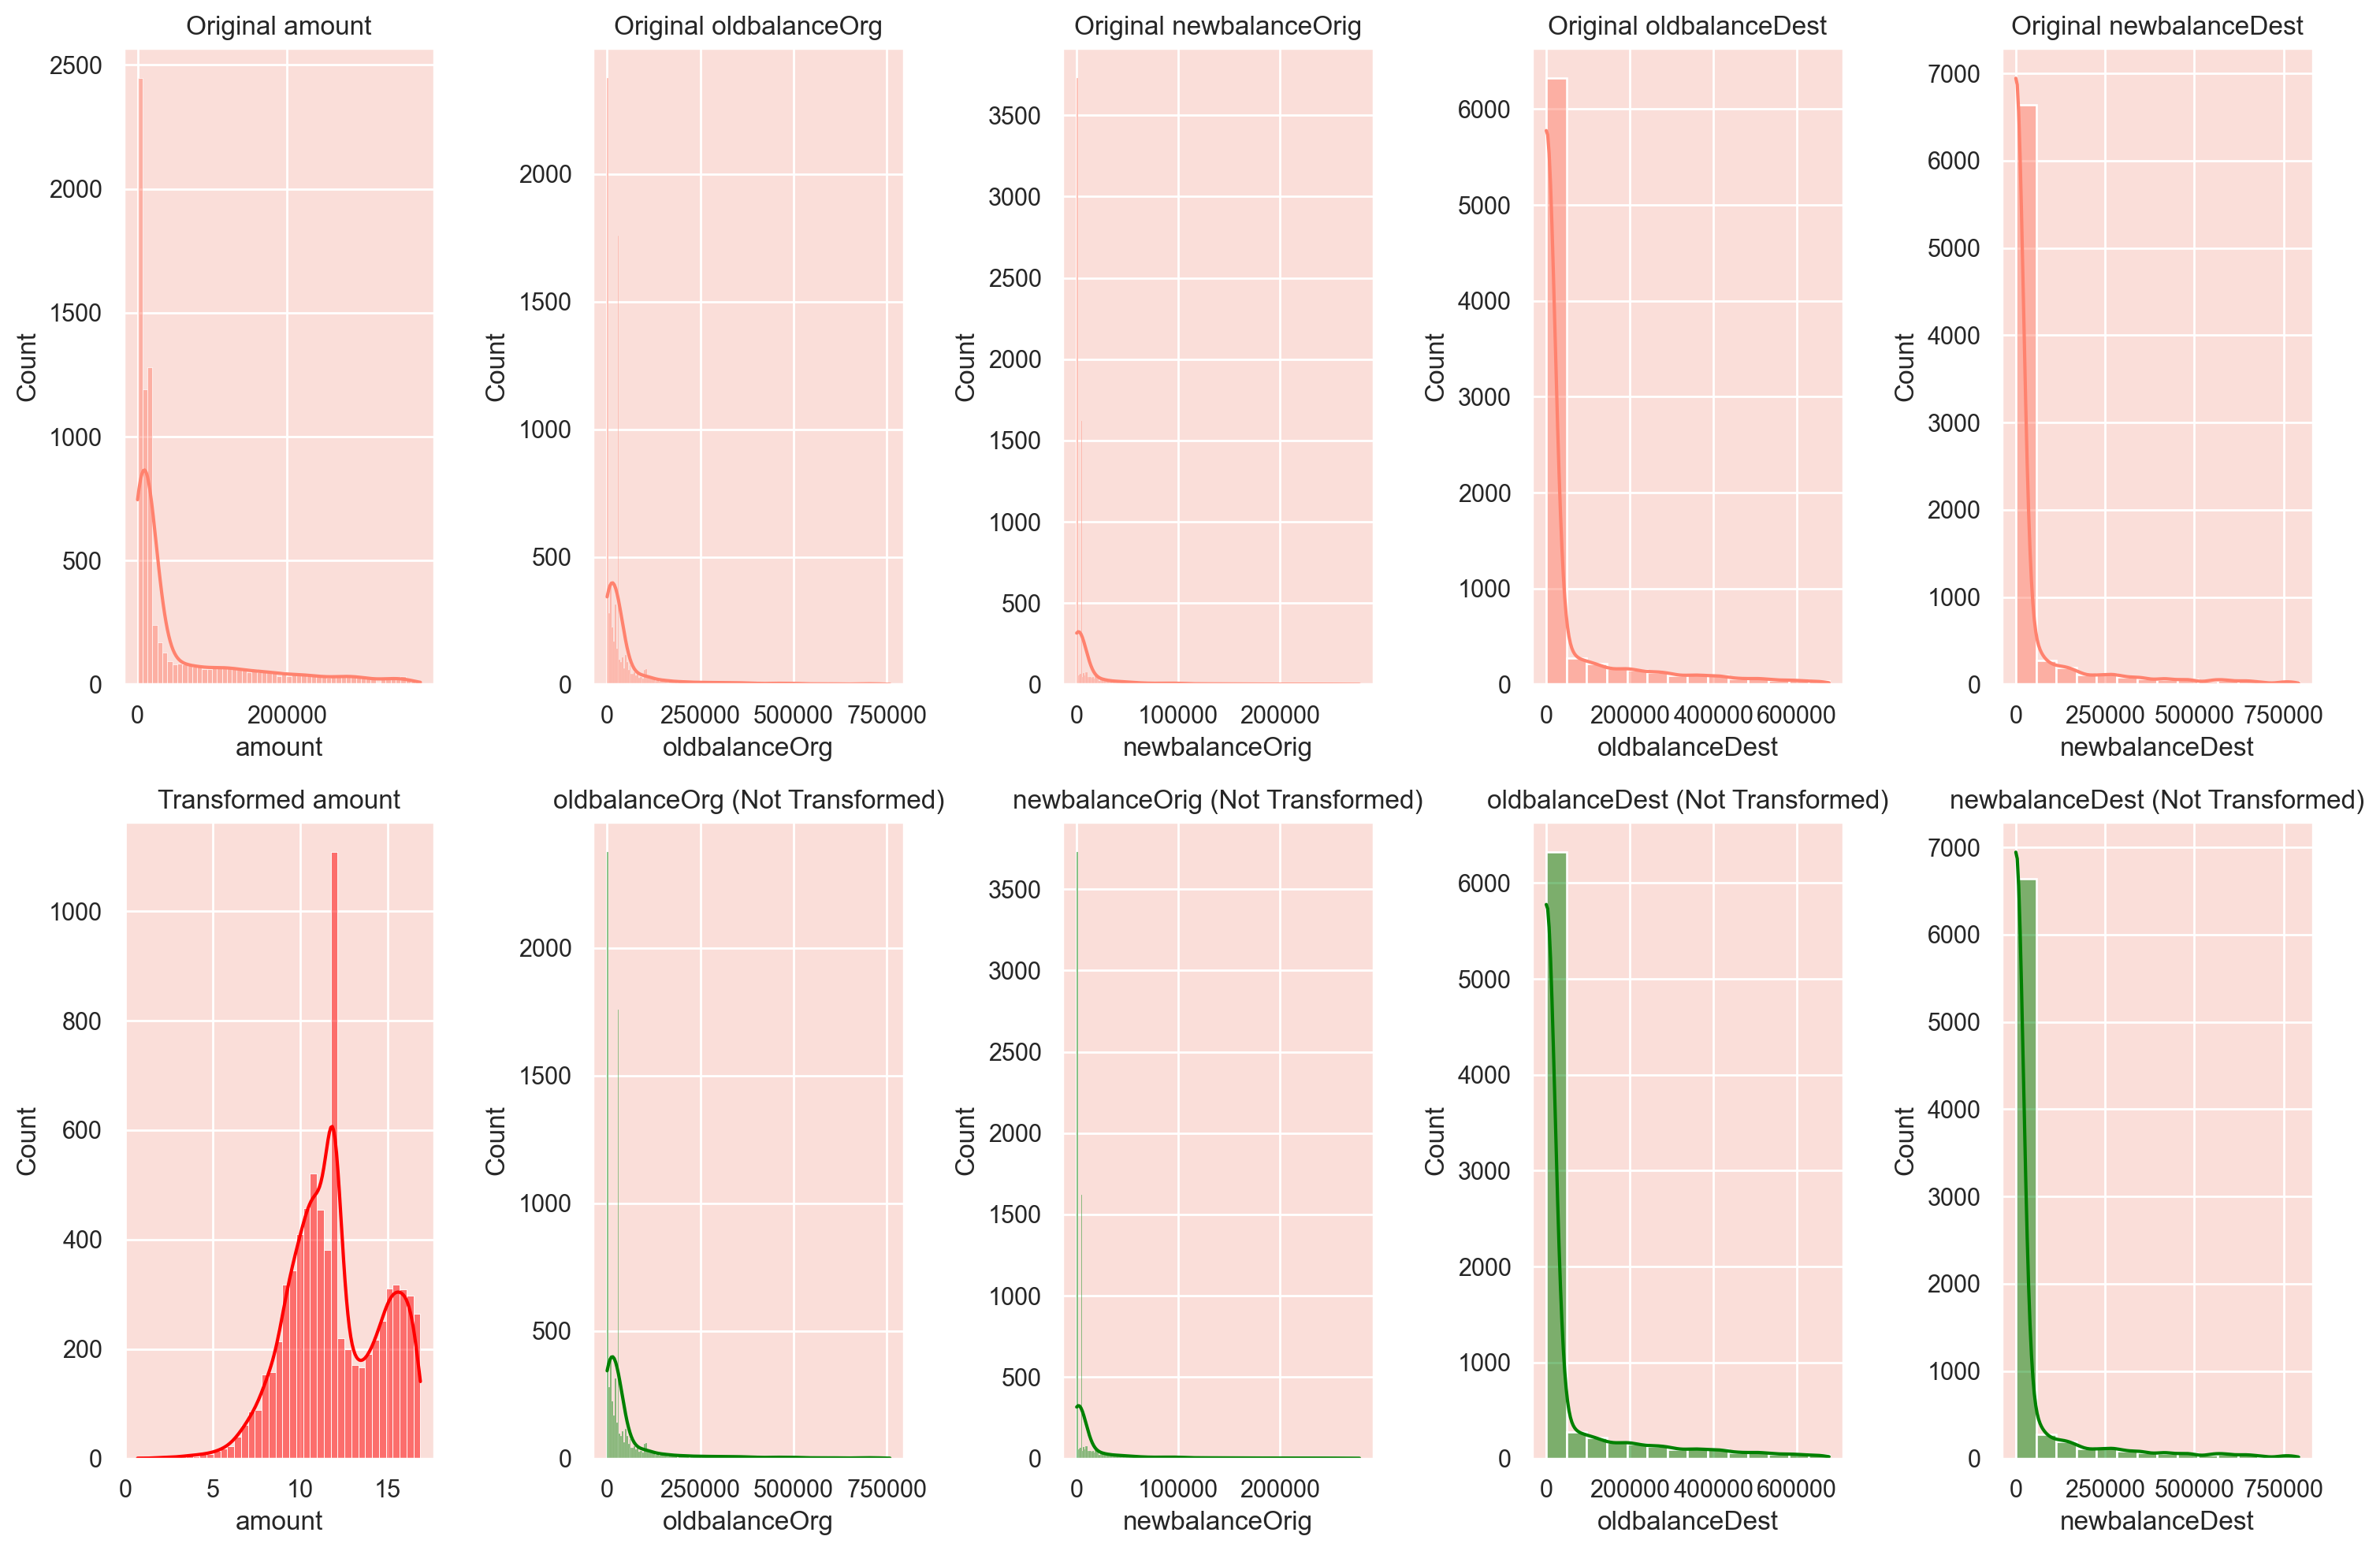

In [45]:
# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')
    

# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply box-cox for positive values
    
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

<a id="dt"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Decision Tree Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="dt_base"></a>
# <b><span style='color:#ff826e'>Step 6.1 |</span><span style='color:brown'> DT Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

First, let's define the base DT model:

In [46]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=42)

____
<a id="dt_hp"></a>
# <b><span style='color:#ff826e'>Step 6.2 |</span><span style='color:brown'> DT  Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:120%; text-align:left">

__🔍<span style="font-size:130%; color:brown"> Note: </span>__ In medical scenarios, especially in the context of diagnosing illnesses, it's often more important __to have a high recall (sensitivity) for the positive class (patients with the condition)__. A high recall ensures that most of the actual positive cases are correctly identified, even if it means some false positives (cases where healthy individuals are misclassified as having the condition). The rationale is that it's generally better to have a few false alarms than to miss out on diagnosing a patient with a potential illness.

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

I am establishing a function to determine the optimal set of hyperparameters that yield the highest __recall__ for the model. This approach ensures a reusable framework for hyperparameter tuning of subsequent models:

In [47]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our DT model:

In [48]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,5],
    'min_samples_split': [2, 3, 4,5],
    'min_samples_leaf': [1, 2,3]
}

In [49]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [50]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


____
<a id="dt_eval"></a>
# <b><span style='color:#ff826e'>Step 6.3 |</span><span style='color:brown'> DT Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:115%; text-align:left">

Now let's evaluate our DT model performance on both the training and test datasets:

In [51]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7000
           1       0.88      0.96      0.92       799

    accuracy                           0.98      7799
   macro avg       0.94      0.97      0.96      7799
weighted avg       0.98      0.98      0.98      7799



In [52]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3000
           1       0.89      0.94      0.92       343

    accuracy                           0.98      3343
   macro avg       0.94      0.97      0.95      3343
weighted avg       0.98      0.98      0.98      3343



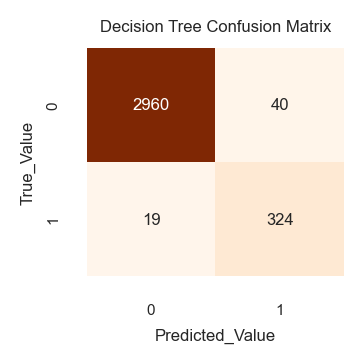

In [53]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_dt = confusion_matrix(y_test,best_dt.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_dt,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Decision Tree Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

Given that the metric values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:

In [54]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [55]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.99,0.89,0.99,0.94,0.99,0.92,0.94,0.97,0.95,0.98


In [56]:
X_test.shape

(3343, 11)

In [57]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

<a id="rf"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Random Forest Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="rf_base"></a>
# <b><span style='color:#ff826e'>Step 7.1 |</span><span style='color:brown'> RF Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

First, let's define the base RF model:

In [58]:
rf_base = RandomForestClassifier(random_state=25)

____
<a id="rf_hp"></a>
# <b><span style='color:#ff826e'>Step 7.2 |</span><span style='color:brown'> RF Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">
    
Afterward, I am setting up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our RF model:

In [60]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [61]:
df_modified.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [62]:
len(df_modified.columns)

8

In [63]:
X_train.shape

(7799, 11)

In [64]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


____
<a id="rf_eval"></a>
# <b><span style='color:#ff826e'>Step 7.3 |</span><span style='color:brown'> RF Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:115%; text-align:left">

Finally, I am evaluating the model's performance on both the training and test datasets:

In [71]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7000
           1       0.92      0.83      0.87       799

    accuracy                           0.97      7799
   macro avg       0.95      0.91      0.93      7799
weighted avg       0.97      0.97      0.97      7799



In [72]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3000
           1       0.90      0.81      0.85       343

    accuracy                           0.97      3343
   macro avg       0.94      0.90      0.92      3343
weighted avg       0.97      0.97      0.97      3343



<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

The RF model's similar performance on both training and test data suggests it isn't overfitting.

In [73]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.98,0.9,0.99,0.81,0.98,0.85,0.94,0.9,0.92,0.97


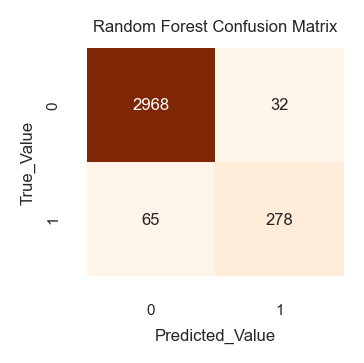

In [74]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_rf = confusion_matrix(y_test,best_rf.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_rf,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<a id="logistic"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Logistic Regression Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="logistic_base"></a>
# <b><span style='color:#ff826e'>Step 8.1 |</span><span style='color:brown'> Logistic Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;8; font-size:115%; text-align:left">

First of all, let's define the base LR model and set up the pipeline with scaling:

In [75]:
# Define the base logistic model and set up the pipeline with scaling
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression())
])

____
<a id="logistic_hp"></a>
# <b><span style='color:#ff826e'>Step 8.2 |</span><span style='color:brown'> Logistic Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; color:black; font-size:115%; text-align:left">

I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our Logistic pipeline:

In [76]:
# Hyperparameter grid for Logistic Regression
# penalty - determines the regularization, and helps prevent overfitting by adding a penalty to the optimization objective.
# 'l1' refers to Lasso regularization, and 'l2' refers to Ridge regularization
# 'C' - inverse of the regularization strength, smaller values specify stronger regularization
# 'solver' - algorithm used for optimization in LR,  'liblinear' is suitable for small datasets, 'saga' for larger dataset
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

In [77]:
logistic_base=LogisticRegression()


In [78]:
# Call the function for hyperparameter tuning with logistic regression
best_logistic, best_logistic_hyperparams = tune_clf_hyperparameters(logistic_base, param_grid_logistic, X_train, y_train)

# Print the optimal hyperparameters for logistic regression
print('Logistic Regression Optimal Hyperparameters: \n', best_logistic_hyperparams)

Logistic Regression Optimal Hyperparameters: 
 {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


____
<a id="logistic_eval"></a>
# <b><span style='color:#ff826e'>Step 8.3 |</span><span style='color:brown'> Logistic Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

Let's evaluate the model's performance on both the training and test datasets:

In [79]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_logistic.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7000
           1       0.79      0.82      0.81       799

    accuracy                           0.96      7799
   macro avg       0.89      0.90      0.89      7799
weighted avg       0.96      0.96      0.96      7799



In [80]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3000
           1       0.76      0.78      0.77       343

    accuracy                           0.95      3343
   macro avg       0.87      0.87      0.87      3343
weighted avg       0.95      0.95      0.95      3343



<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

The Logistic model's consistent scores across training and test sets indicate no overfitting.

In [81]:
logistic_evaluation = evaluate_model(best_logistic, X_test, y_test, 'LR')
logistic_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
LR,0.97,0.76,0.97,0.78,0.97,0.77,0.87,0.87,0.87,0.95


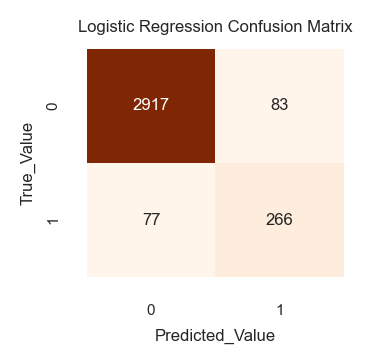

In [82]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_lr = confusion_matrix(y_test,best_logistic.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_lr,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<a id="svm"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | SVM Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="svm_base"></a>
# <b><span style='color:#ff826e'>Step 9.1 |</span><span style='color:brown'> SVM Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

First, let's define the base SVM model and set up the pipeline with scaling:

In [83]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC()) 
])

____
<a id="svm_hp"></a>
# <b><span style='color:#ff826e'>Step 9.2 |</span><span style='color:brown'> SVM Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">
    
Let's configure the hyperparameters grid and employ the __tune_clf_hyperparameters__ function to determine the best hyperparameters for our SVM pipeline:

In [84]:
param_grid_svm = {
    'svm__C': [5],
    'svm__kernel': ['linear', 'rbf', 'poly'],
#     'svm__gamma': [2],
#     'svm__degree': [2,3,4]
}

In [85]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 5, 'svm__kernel': 'poly'}


____
<a id="svm_eval"></a>
# <b><span style='color:#ff826e'>Step 9.3 |</span><span style='color:brown'> SVM Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

Let's evaluate our SVM model's performance on both the training and test datasets:

In [86]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7000
           1       0.87      0.95      0.91       799

    accuracy                           0.98      7799
   macro avg       0.93      0.97      0.95      7799
weighted avg       0.98      0.98      0.98      7799



In [87]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3000
           1       0.86      0.93      0.89       343

    accuracy                           0.98      3343
   macro avg       0.93      0.96      0.94      3343
weighted avg       0.98      0.98      0.98      3343



<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:120%; text-align:left">
    
<h2 align="left"><font color=brown>✅ Inference:</font></h2>

The __recall of 0.99 for class 1__ indicates that almost all the __true positive cases (i.e., patients with heart disease)__ are correctly identified. This high recall is of utmost importance in a medical context, where missing a patient with potential heart disease could have dire consequences.

However, it's also worth noting the balanced performance of the model. With an __F1-score of 0.99 for class 1__, it's evident that the model doesn't merely focus on maximizing recall at the expense of precision. This means the reduction in False Negatives hasn't significantly increased the False Positives, ensuring that the cost and effort of examining healthy individuals are not unnecessarily high.

Overall, the model's performance is promising for medical diagnostics, especially when prioritizing the accurate identification of patients with heart disease without overburdening the system with false alarms.

In [88]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.99,0.86,0.98,0.93,0.99,0.89,0.93,0.96,0.94,0.98


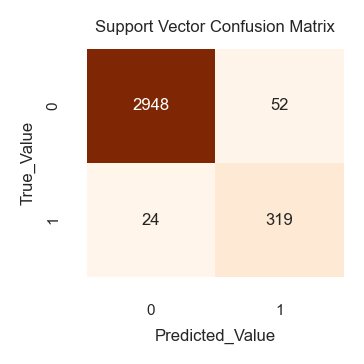

In [89]:
# Plotting the Confusion Matrix for Support Vector Classifier Algorithm
cm_svc = confusion_matrix(y_test, best_svm.predict(X_test))
plt.figure(figsize=(1.8,1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_svc,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Support Vector Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<a id="svm"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 | XGBoost Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

In [90]:
import xgboost as xgb
# Train an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
[[2990   10]
 [   9  334]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       0.97      0.97      0.97       343

    accuracy                           0.99      3343
   macro avg       0.98      0.99      0.98      3343
weighted avg       0.99      0.99      0.99      3343


ROC AUC Score:
0.9990626822157435


<a id="conclusion"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | Conclusion</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color: black; font-size:120%; text-align:left">

In the critical context of diagnosing heart disease, our primary objective is __to ensure a high recall for the positive class__. It's imperative to accurately identify every potential heart disease case, as even one missed diagnosis could have dire implications. However, while striving for this high recall, it's essential to maintain a balanced performance to avoid unnecessary medical interventions for healthy individuals. We'll now evaluate our models against these crucial medical benchmarks.



In [91]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, logistic_evaluation,svm_evaluation]
results = pd.concat(all_evaluations)


# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.99,0.89,0.99,0.94,0.99,0.92,0.94,0.97,0.95,0.98
SVM,0.99,0.86,0.98,0.93,0.99,0.89,0.93,0.96,0.94,0.98
RF,0.98,0.90,0.99,0.81,0.98,0.85,0.94,0.90,0.92,0.97
LR,0.97,0.76,0.97,0.78,0.97,0.77,0.87,0.87,0.87,0.95


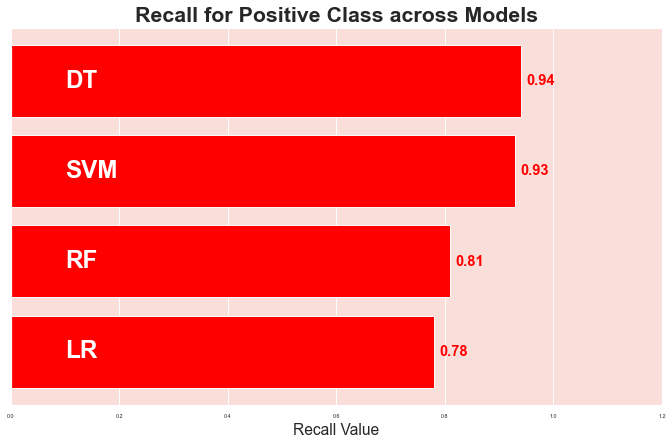

In [92]:
# Sort values based on 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color: black; font-size:120%; text-align:left">

**Why I choose Decision Tree Model**

In this project, I evaluated five different models to predict. Through rigorous testing and comparison, the Decision Tree model emerged as the most effective choice. It consistently outperformed the others in terms of precision, recall, F1 score, and accuracy, demonstrating its robustness and reliability in handling the data. The Decision Tree’s ability to capture complex patterns in the dataset while maintaining high performance metrics makes it the optimal model for this task.



<a id="prediction"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12 | Prediction</p>

⬆️ [Table of Contents](#contents_tabel)

In [93]:
df['type'].unique()

array(['TRANSFER', 'CASH_OUT', 'PAYMENT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [95]:
df_modified

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1.0,TRANSFER,181.00,181.00,0.000,0.0,0.00,1
1,1.0,CASH_OUT,181.00,181.00,0.000,21182.0,0.00,1
2,1.0,TRANSFER,2806.00,2806.00,0.000,0.0,0.00,1
3,1.0,CASH_OUT,2806.00,2806.00,0.000,26202.0,0.00,1
4,1.0,TRANSFER,20128.00,20128.00,0.000,0.0,0.00,1
...,...,...,...,...,...,...,...,...
11137,7.0,DEBIT,6393.71,433084.38,4420.605,478421.0,210535.25,0
11138,7.0,CASH_OUT,298799.54,426690.68,127891.140,0.0,0.00,0
11139,7.0,CASH_OUT,16761.26,127891.14,0.000,610479.0,749621.53,0
11140,7.0,PAYMENT,1094.03,13918.00,12823.970,0.0,0.00,0


In [96]:
df_modified.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [97]:
# Function to make a prediction based on user input
def predict(features):
    return best_dt.predict(np.array(features).reshape(1, -1))

# Define feature names
feature_names = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest','type_CASH_IN' , 'type_CASH_OUT', 'type_DEBIT','type_PAYMENT', 'type_TRANSFER']

# Create input widgets
feature_widgets = [widgets.FloatText(value=0.0, description=f'{feature}:') for feature in feature_names]

# Create a button for making predictions
predict_button = widgets.Button(description="Predict")

# Output widget to display prediction
output_widget = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    user_input = [float(widget.value) for widget in feature_widgets]
    prediction = predict(user_input)

    # Display the prediction using IPython.display
    with output_widget:
        display(HTML(f"<b>Prediction:</b> {prediction[0]}"))

# Attach the button click event
predict_button.on_click(on_button_click)

# Display widgets and output area
display(*feature_widgets, predict_button, output_widget)


FloatText(value=0.0, description='step:')

FloatText(value=0.0, description='amount:')

FloatText(value=0.0, description='oldbalanceOrg:')

FloatText(value=0.0, description='newbalanceOrig:')

FloatText(value=0.0, description='oldbalanceDest:')

FloatText(value=0.0, description='newbalanceDest:')

FloatText(value=0.0, description='type_CASH_IN:')

FloatText(value=0.0, description='type_CASH_OUT:')

FloatText(value=0.0, description='type_DEBIT:')

FloatText(value=0.0, description='type_PAYMENT:')

FloatText(value=0.0, description='type_TRANSFER:')

Button(description='Predict', style=ButtonStyle())

Output()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color: black; font-size:120%; text-align:left">

**Final Conclusion:**

In response to the growing threat of fraud in mobile financial transactions, this project set out to develop an accurate and efficient solution for real-time fraud detection. After evaluating five different machine learning models, the Decision Tree model was chosen as the best approach. It demonstrated superior performance across key metrics, including precision, recall, F1 score, and accuracy, making it the most effective tool for identifying fraudulent transactions quickly and accurately.

By implementing the Decision Tree model, we have created a robust and reliable system that not only enhances the security of mobile financial transactions but also maintains a seamless user experience. This solution significantly reduces the risk of financial losses, providing a strong safeguard against fraud in the ever-expanding mobile financial services industry.

<div style="display: flex; align-items: center; justify-content: center; border-radius: 10px; padding: 20px; background-color: #fbaa7f; color: black; font-size: 120%; text-align: center;">

<strong>🎯 If you need more information or want to explore the code, feel free to visit the project repository on <a href="https://github.com/sushilrgupta/Capstone-Project_Detection-of-Heart-Disease.git">GitHub</a> 🎯</strong>
</div>


<h2 align="left"><font color='red'>Best Regards!</font></h2>

In [ ]:
df['type'].unique()

array(['TRANSFER', 'CASH_OUT', 'PAYMENT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df.shape

(11142, 10)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print(Q1)
print(Q3)

step                 2.0000
type                 1.0000
amount            4946.6175
nameOrig          2785.2500
oldbalanceOrg      427.0000
newbalanceOrig       0.0000
nameDest           967.0000
oldbalanceDest       0.0000
newbalanceDest       0.0000
isFraud              0.0000
Name: 0.25, dtype: float64
step                   7.0000
type                   3.0000
amount            154336.5750
nameOrig            8355.7500
oldbalanceOrg     304085.4800
newbalanceOrig    111412.6350
nameDest            4721.7500
oldbalanceDest    271155.4725
newbalanceDest    318637.3600
isFraud                0.0000
Name: 0.75, dtype: float64


In [ ]:
Iqr = Q3 -Q1
outlyers = 

In [ ]:
import pandas as pd

# Example DataFrame with one column
data = {'Feature': [1, 2, 3, 4, 5, 6, 7, 8, 100]}
df = pd.DataFrame(data)

# Calculate the mean and standard deviation
mean = df['Feature'].mean()
std = df['Feature'].std()

# Calculate the Z-Score for each value
df['Z-Score'] = (df['Feature'] - mean) / std

# Identify outliers (Z-Score > 3 or < -3)
outliers = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]

# Remove outliers from the DataFrame
df_clean = df[(df['Z-Score'] <= 3) & (df['Z-Score'] >= -3)]

print("Outliers:")
print(outliers)
print("\nCleaned DataFrame:")
print(df_clean)


In [ ]:
# Count of each class
df['type'].value_counts()

type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['type']

0        4
1        1
2        4
3        1
4        4
        ..
11137    2
11138    1
11139    1
11140    3
11141    3
Name: type, Length: 11142, dtype: int32

In [ ]:
label_encoder = LabelEncoder()
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])
df['nameDest']

0        1517
1        1338
2        1968
3           8
4         867
         ... 
11137    1651
11138     774
11139     284
11140    7463
11141    6411
Name: nameDest, Length: 11142, dtype: int32

In [ ]:
label_encoder = LabelEncoder()
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameOrig']

0         1751
1        10212
2         2397
3         6397
4         2130
         ...  
11137     1888
11138    10749
11139     8872
11140     1258
11141     3703
Name: nameOrig, Length: 11142, dtype: int32

In [ ]:
X = df.drop('isFraud',axis=1)
y = df['isFraud']

In [ ]:
df['type'] = df['type'].astype(float)
df['nameOrig'] = df['nameOrig'].astype(float)
df['nameDest'] = df['nameDest'].astype(float)

In [ ]:
X


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,4,181.00,1751,181.00,0.00,1517,0.00,0.00
1,1,1,181.00,10212,181.00,0.00,1338,21182.00,0.00
2,1,4,2806.00,2397,2806.00,0.00,1968,0.00,0.00
3,1,1,2806.00,6397,2806.00,0.00,8,26202.00,0.00
4,1,4,20128.00,2130,20128.00,0.00,867,0.00,0.00
...,...,...,...,...,...,...,...,...,...
11137,7,2,6393.71,1888,433084.38,426690.68,1651,478421.00,210535.25
11138,7,1,298799.54,10749,426690.68,127891.14,774,704355.36,5270364.19
11139,7,1,423159.63,8872,127891.14,0.00,284,610479.00,749621.53
11140,7,3,1094.03,1258,13918.00,12823.97,7463,0.00,0.00


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11137    0
11138    0
11139    0
11140    0
11141    0
Name: isFraud, Length: 11142, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.03
R-squared: 0.68


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
mse
rmse

0.17207466531754567

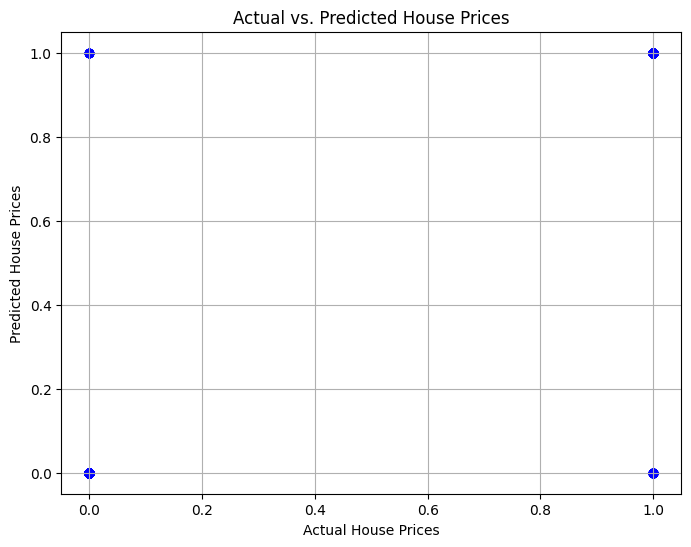

In [ ]:
# Step 8: Visualization
# Visualize the actual vs. predicted house prices using a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()